# 1. Introduction
In this analysis, we aim to explore patterns in a dataset that includes features such as 'Latitude', 'Hour', and 'Risk Level'. The primary objective is to identify groups within the data through clustering and analyze their characteristics. These clusters may inform future classification tasks, where we predict the 'Risk Level' based on these features. The dataset consists of multiple observations with the following columns:
- **Latitude**: The geographical location of the observations.
- **Hour**: The time of the observation (ranging from 0 to 23 hours).
- **Risk Level**: A categorical variable indicating the risk level ( low, medium, high).


# Part 1 Classification with Decision Tree - Gini and Entropy

##### In this notebook, we apply Decision Tree classification to a dataset using both the **Gini Index** and **Entropy** as the criteria to split nodes. We evaluate the model performance with various splits of training and test data.

## 1. Data Preparation
###### we preprocess the dataset and prepare it for classification. We load the processed dataset and separate the features (X) and the target variable (y).



In [2]:

import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics



df = pd.read_csv("/workspaces/IT326/Dataset/Processed_dataset.csv", encoding="ISO-8859-1")


#df = df.drop(columns=['Hour'])

# Separate features and target
X = df.drop(columns=df.columns[11])  
y = df.iloc[:, 11]                   

print(X.head())
print(y.head())



   Year  Month  Day  Weekend?      Hour  Collision Type  Injury Type  \
0  2015      1    5         0  0.000000               1            2   
1  2015      1    6         0  0.652174               1            2   
2  2015      1    6         1  1.000000               1            3   
3  2015      1    7         1  0.391304               1            3   
4  2015      1    7         1  0.478261               1            2   

   Primary Factor  Reported_Location  Latitude  Longitude  Hour_Bin  
0              27               1301  0.949805   0.013861         3  
1              11               1612  0.949860   0.013810         0  
2               5               4438  0.949577   0.013616         1  
3              10              10505  0.949962   0.013576         2  
4              10              18788  0.949942   0.013555         2  
0    Moderate Risk
1    Moderate Risk
2         Low Risk
3        High Risk
4    Moderate Risk
Name: Risk Level, dtype: object


- df is the DataFrame containing the dataset.
- X contains the features (all columns except for the target variable "Risk Level").
- y contains the target variable, which is the classification label (Risk Level).
- The .head() method displays the first few rows of the dataset to ensure everything is loaded correctly.


## 2. Splitting the Dataset
#### Train-Test Split
We split the dataset into training and testing sets using a 70-30 split as the default for initial testing. The model will be trained on the training set and evaluated on the testing set.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


- X_train, X_test, y_train, y_test represent the features and target variables for the training and testing datasets respectively.
- test_size=0.3 specifies that 30% of the data will be used for testing and 70% for training.
- random_state=1 ensures that the split is reproducible.


## 3. Decision Tree Training with Gini Index
#### Model Training
We initialize a DecisionTreeClassifier with the default criterion, which is the Gini Index. We then train the model using the training data.

In [4]:
#splitting 30-70

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Gini
clf = DecisionTreeClassifier(random_state=1 , max_depth=3)
#train
clf = clf.fit(X_train ,  y_train )


- clf.fit(X_train, y_train) trains the decision tree on the training data.
- max_depth=3 is set to limit the depth of the tree and prevent overfitting.

- Outcome:
A trained Decision Tree model that uses the training data to learn how to classify instances into Low Risk, Moderate Risk, or High Risk.


#### Predictions and Evaluation
We make predictions on the test set and evaluate the model's performance.

In [5]:
# Make predictions
y_pred = clf.predict(X_test)

# Results
print("Gini Index Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Gini Index Results:
Accuracy: 0.8942717666687264
Classification Report:
                precision    recall  f1-score   support

    High Risk       0.82      1.00      0.90      6969
     Low Risk       1.00      0.79      0.88      1966
Moderate Risk       0.98      0.83      0.89      7248

     accuracy                           0.89     16183
    macro avg       0.93      0.87      0.89     16183
 weighted avg       0.91      0.89      0.89     16183

Confusion Matrix:
 [[6935    0   34]
 [ 299 1554  113]
 [1265    0 5983]]



Use the trained model to predict labels (y_pred) for the test dataset (X_test).
Evaluate the model using metrics like accuracy, precision, recall, F1-score, and confusion matrix.
- Output:
1. **Accuracy:**
    - Represents the proportion of correctly classified samples (89.4% accuracy for the 70%-30% split).
2. **Classification Report:**
    - Precision: How many of the predicted classes are correct.
    - Recall: How many actual positive classes were correctly identified.
    - F1-Score: Harmonic mean of precision and recall.
3. **Confusion Matrix:**
    - A table that summarizes prediction errors for each class.
    - Interpretation of Confusion Matrix: For 70%-30% split:
    [[6935    0   34] 
    [ 299 1554  113] 
    [1265    0 5983]]

       - Row i represents the true class.
       - Column j represents the predicted class.
       - Diagonal elements are correctly classified.
       - Off-diagonal elements represent misclassifications 1265 High Risks were predicted as Low Risk.









#### Confusion Matrix Visualization
To visualize the confusion matrix, we use the ConfusionMatrixDisplay from sklearn.

Training set size: 37760
Testing set size: 16183
Original dataset size: 53943
Confusion Matrix:
 [[6935    0   34]
 [ 299 1554  113]
 [1265    0 5983]]


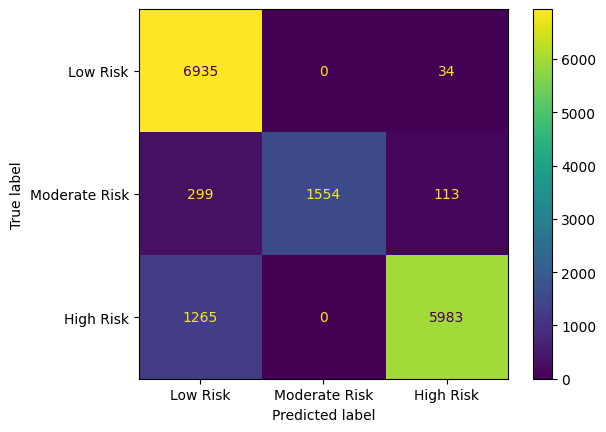

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("Original dataset size:", df.shape[0])

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cn = ["Low Risk", "Moderate Risk", "High Risk"]

disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn )


 it display a graphical representation of the confusion matrix, allowing us to easily understand how well the model performed for each class.
### Interpretation of Each Entry in confusion matrix:

- **6935:** True Positives for Class **'Low Risk'** (correctly predicted as Class **'Low Risk'**).
- **34:** Class **'low Risk'** instances that were misclassified as Class **'high Risk'**.
- **299:** Class **'Moderate Risk'** instances that were misclassified as Class **'Low Risk'**.
- **1554:** True Positives for Class **'Moderate Risk'** (correctly predicted as Class **'Moderate Risk'**).
- **113:** Class **'Moderate Risk'** instances that were misclassified as Class **'High Risk'**.
- **1265:** Class **'high Risk'** instances that were misclassified as Class **'Low Risk'**.
- **5983:** True Positives for Class **'High Risk'** (correctly predicted as Class **'High Risk'**).


#### Visualizing the Decision Tree
We also visualize the decision tree to understand how it makes decisions based on the features.

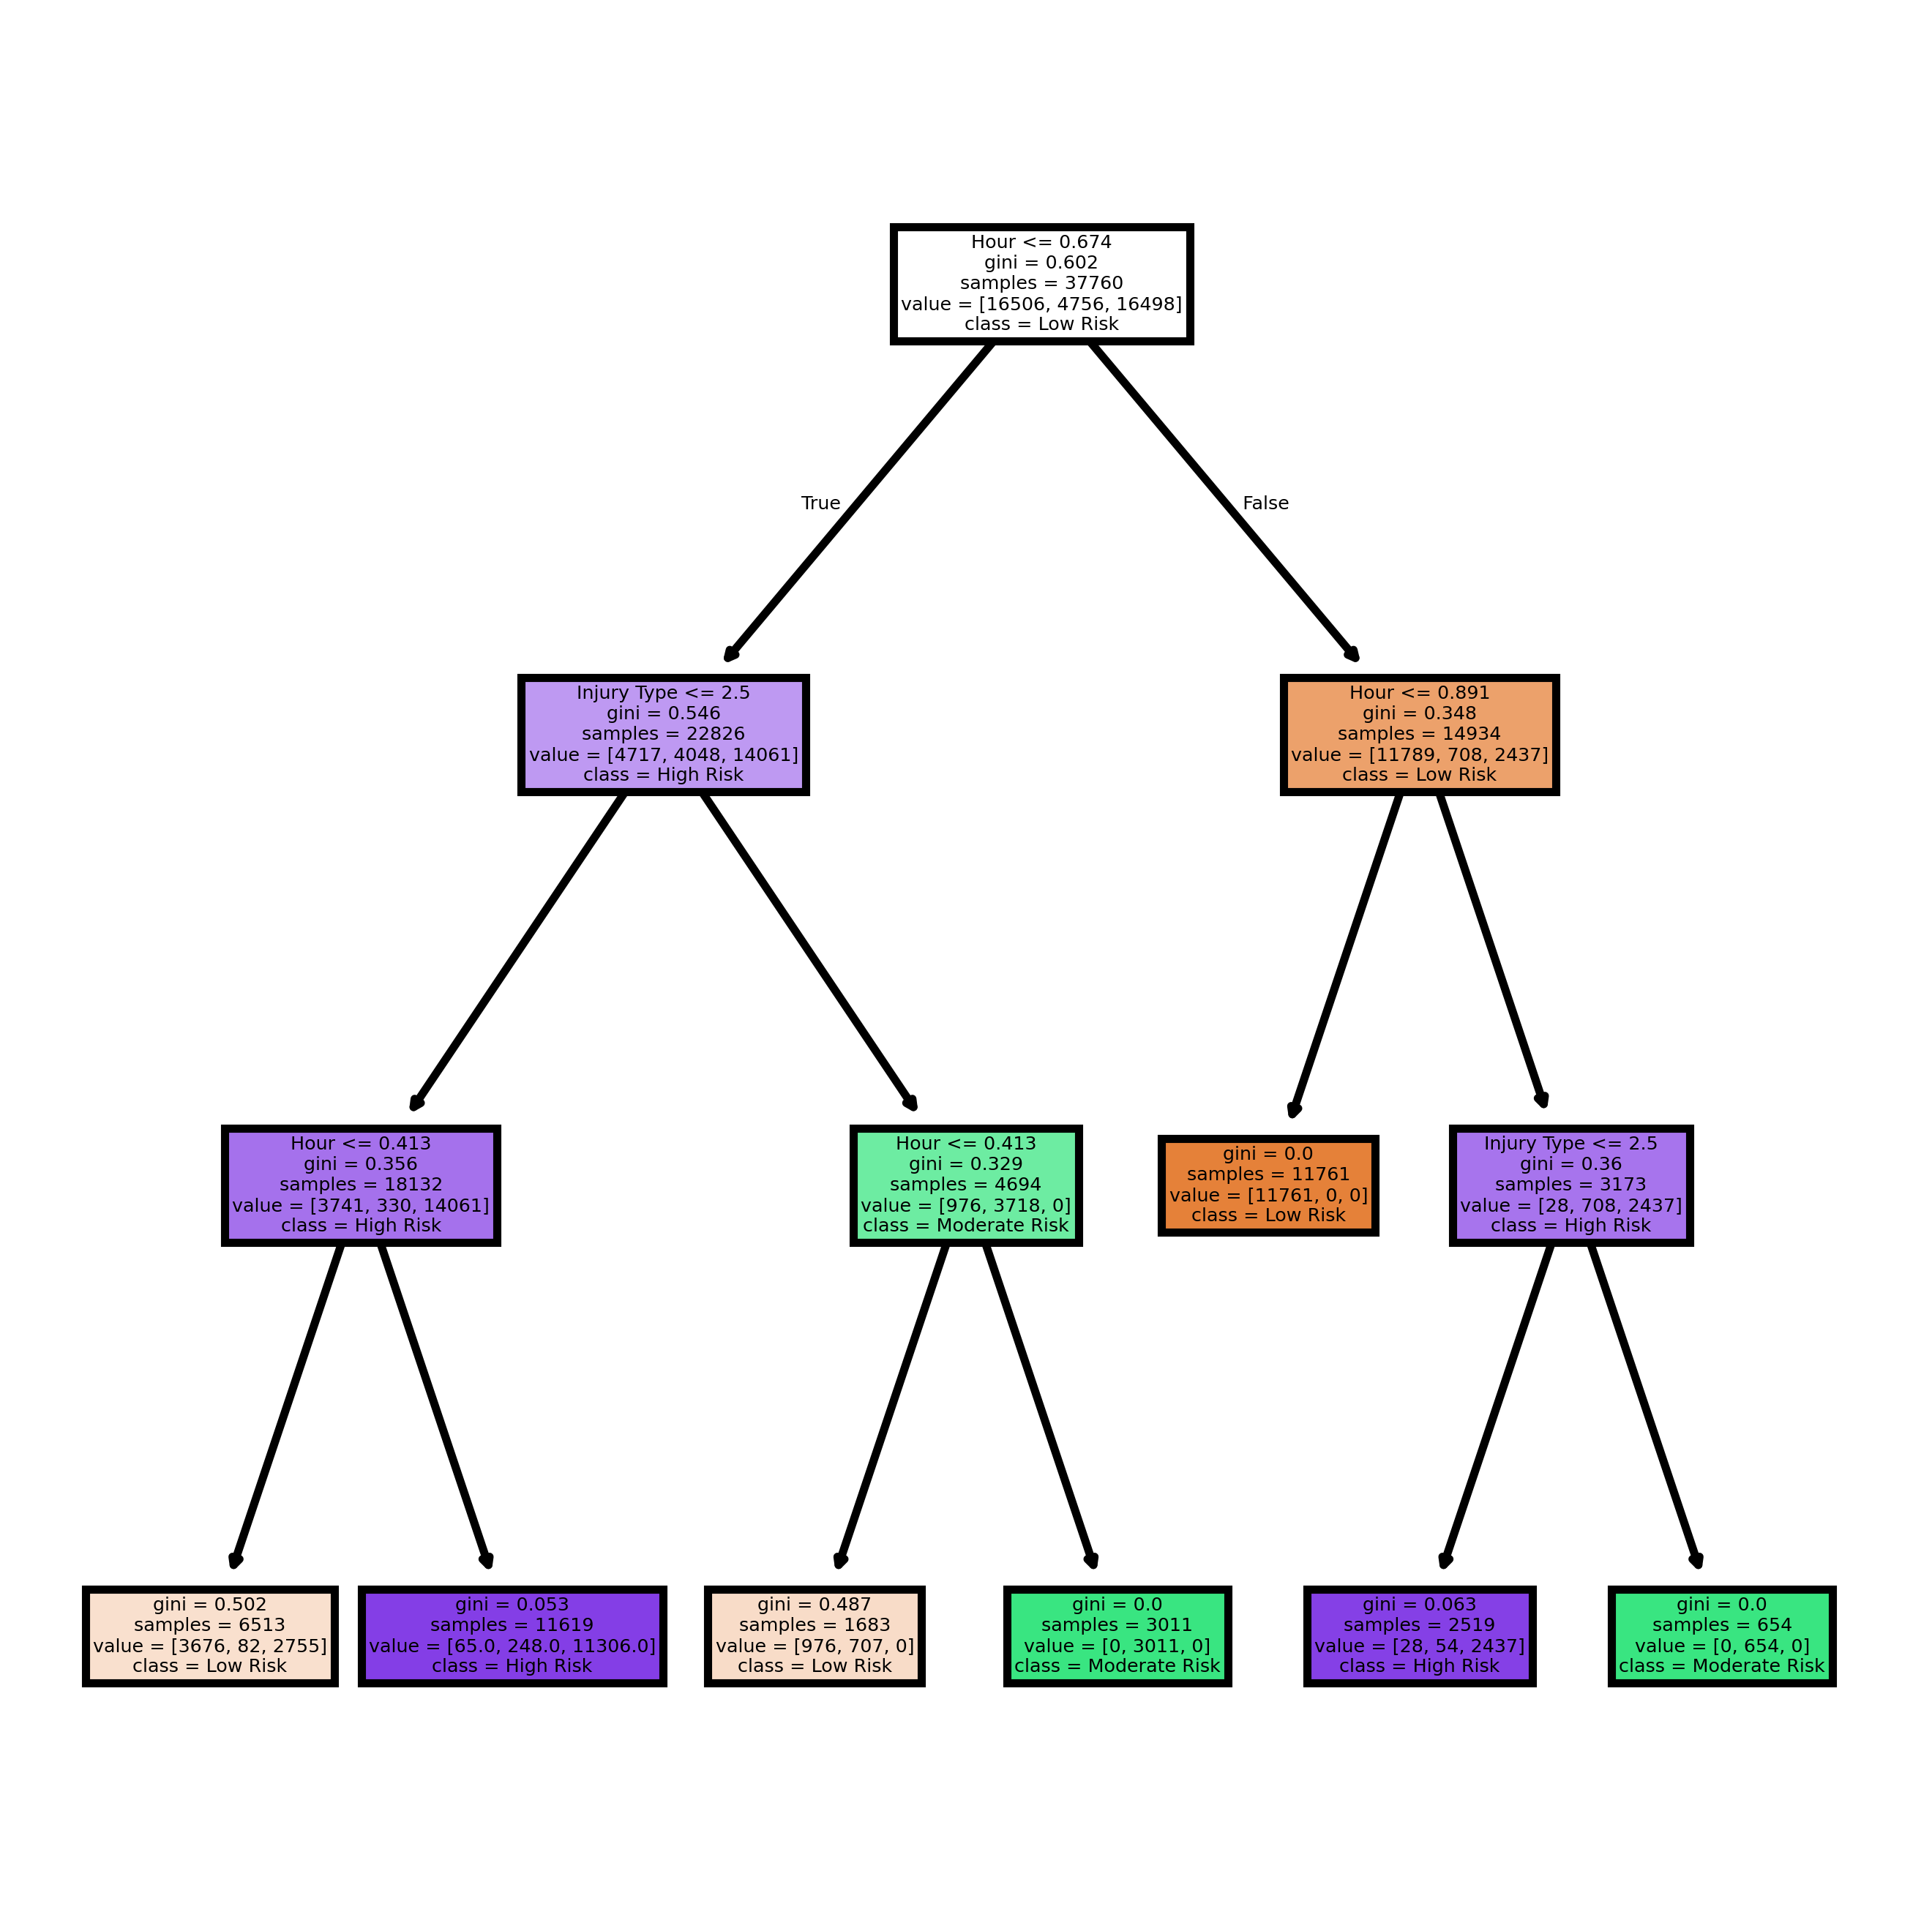

In [7]:
from sklearn import tree
import matplotlib.pyplot as plt
fn = ['Year', 'Month', 'Day', 'Weekend?','Hour', 'Collision Type', 'Injury Type', 'Primary Factor', 'Latitude', 'Longitude', 'Hour_Bin'] #df column names without column risk level

cn = ["Low Risk", "Moderate Risk", "High Risk"]

fig, axes = plt.subplots(nrows = 1, figsize=(4, 4), dpi=800)
tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True)
plt.show()
#fig.savefig("")






Visualize how the Decision Tree makes decisions.
 - Components:
    - Nodes: Represent decision points based on feature values.
    - Leaves: Represent final classifications (Low Risk, Moderate Risk, High Risk).
    - Colors represent the class distribution at each node 
    - The root node might split on "Hour":
        - If Hour <= 0.674 = Yes, go to the left branch.
        - If Hour <= 0.674 = No, go to the right branch.

Save and Predict using 70 - 30

In [8]:
import pickle
filename_70 = 'decision_tree_model_70_30.sav'
pickle.dump(clf, open(filename_70, 'wb'))


loaded_model_70 = pickle.load(open(filename_70, 'rb'))
predictions_70 = loaded_model_70.predict(X_test)
print("Predictions for 70-30 split test data:\n", predictions_70)

Predictions for 70-30 split test data:
 ['High Risk' 'High Risk' 'High Risk' ... 'Low Risk' 'High Risk'
 'High Risk']


## Repeating for Different Splits and Entropy
- Steps for 80%-20% and 90%-10% splits are similar but with adjusted test sizes.
- For Entropy, the classifier is initialized with criterion="entropy".
  - Comparison shows negligible difference between Gini and Entropy in terms of accuracy (~89%).

### Gini 80 - 20 split

In [9]:
# Splitting the dataset 80-20
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Gini Index
clf = DecisionTreeClassifier(random_state=1 , max_depth=3)  # Gini is the default criterion
# Train the classifier
clf = clf.fit(X_train, y_train)
# Predict on the 20% test set
y_pred = clf.predict(X_test)

# Display results
print("Gini Index Results (80-20 split):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Gini Index Results (80-20 split):
Accuracy: 0.8942441375475021
Classification Report:
                precision    recall  f1-score   support

    High Risk       0.82      1.00      0.90      4681
     Low Risk       1.00      0.80      0.89      1321
Moderate Risk       0.98      0.82      0.89      4787

     accuracy                           0.89     10789
    macro avg       0.93      0.87      0.89     10789
 weighted avg       0.91      0.89      0.89     10789

Confusion Matrix:
 [[4664    0   17]
 [ 190 1053   78]
 [ 856    0 3931]]


Confusion matrix for gini 80 - 20

Training set size: 43154
Testing set size: 10789
Original dataset size: 53943
Confusion Matrix:
 [[4664    0   17]
 [ 190 1053   78]
 [ 856    0 3931]]


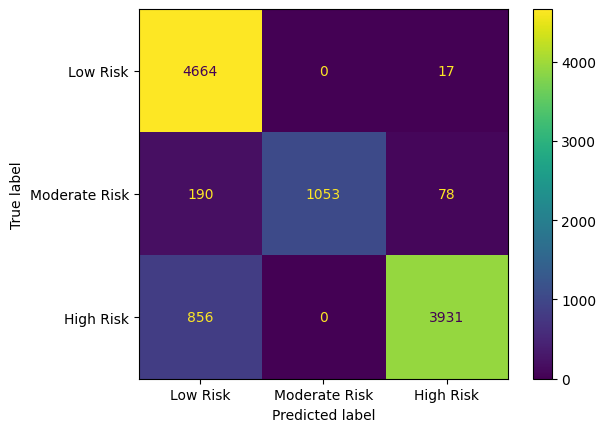

In [10]:
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("Original dataset size:", df.shape[0])

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn )

### Interpretation of Each Entry in Confusion Matrix:
- **4664:** True Positives for Class **'Low Risk'** (correctly predicted as **'Low Risk'**).
- **17:** Class **'Low Risk'** instances misclassified as **'High Risk'**.
- **190:** Class **'Moderate Risk'** instances misclassified as **'Low Risk'**.
- **1053:** True Positives for Class **'Moderate Risk'** (correctly predicted as **'Moderate Risk'**).
- **78:** Class **'Moderate Risk'** instances misclassified as **'High Risk'**.
- **856:** Class **'High Risk'** instances misclassified as **'Low Risk'**.
- **3931:** True Positives for Class **'High Risk'** (correctly predicted as **'High Risk'**).


Desicion tree for gini 80- 20

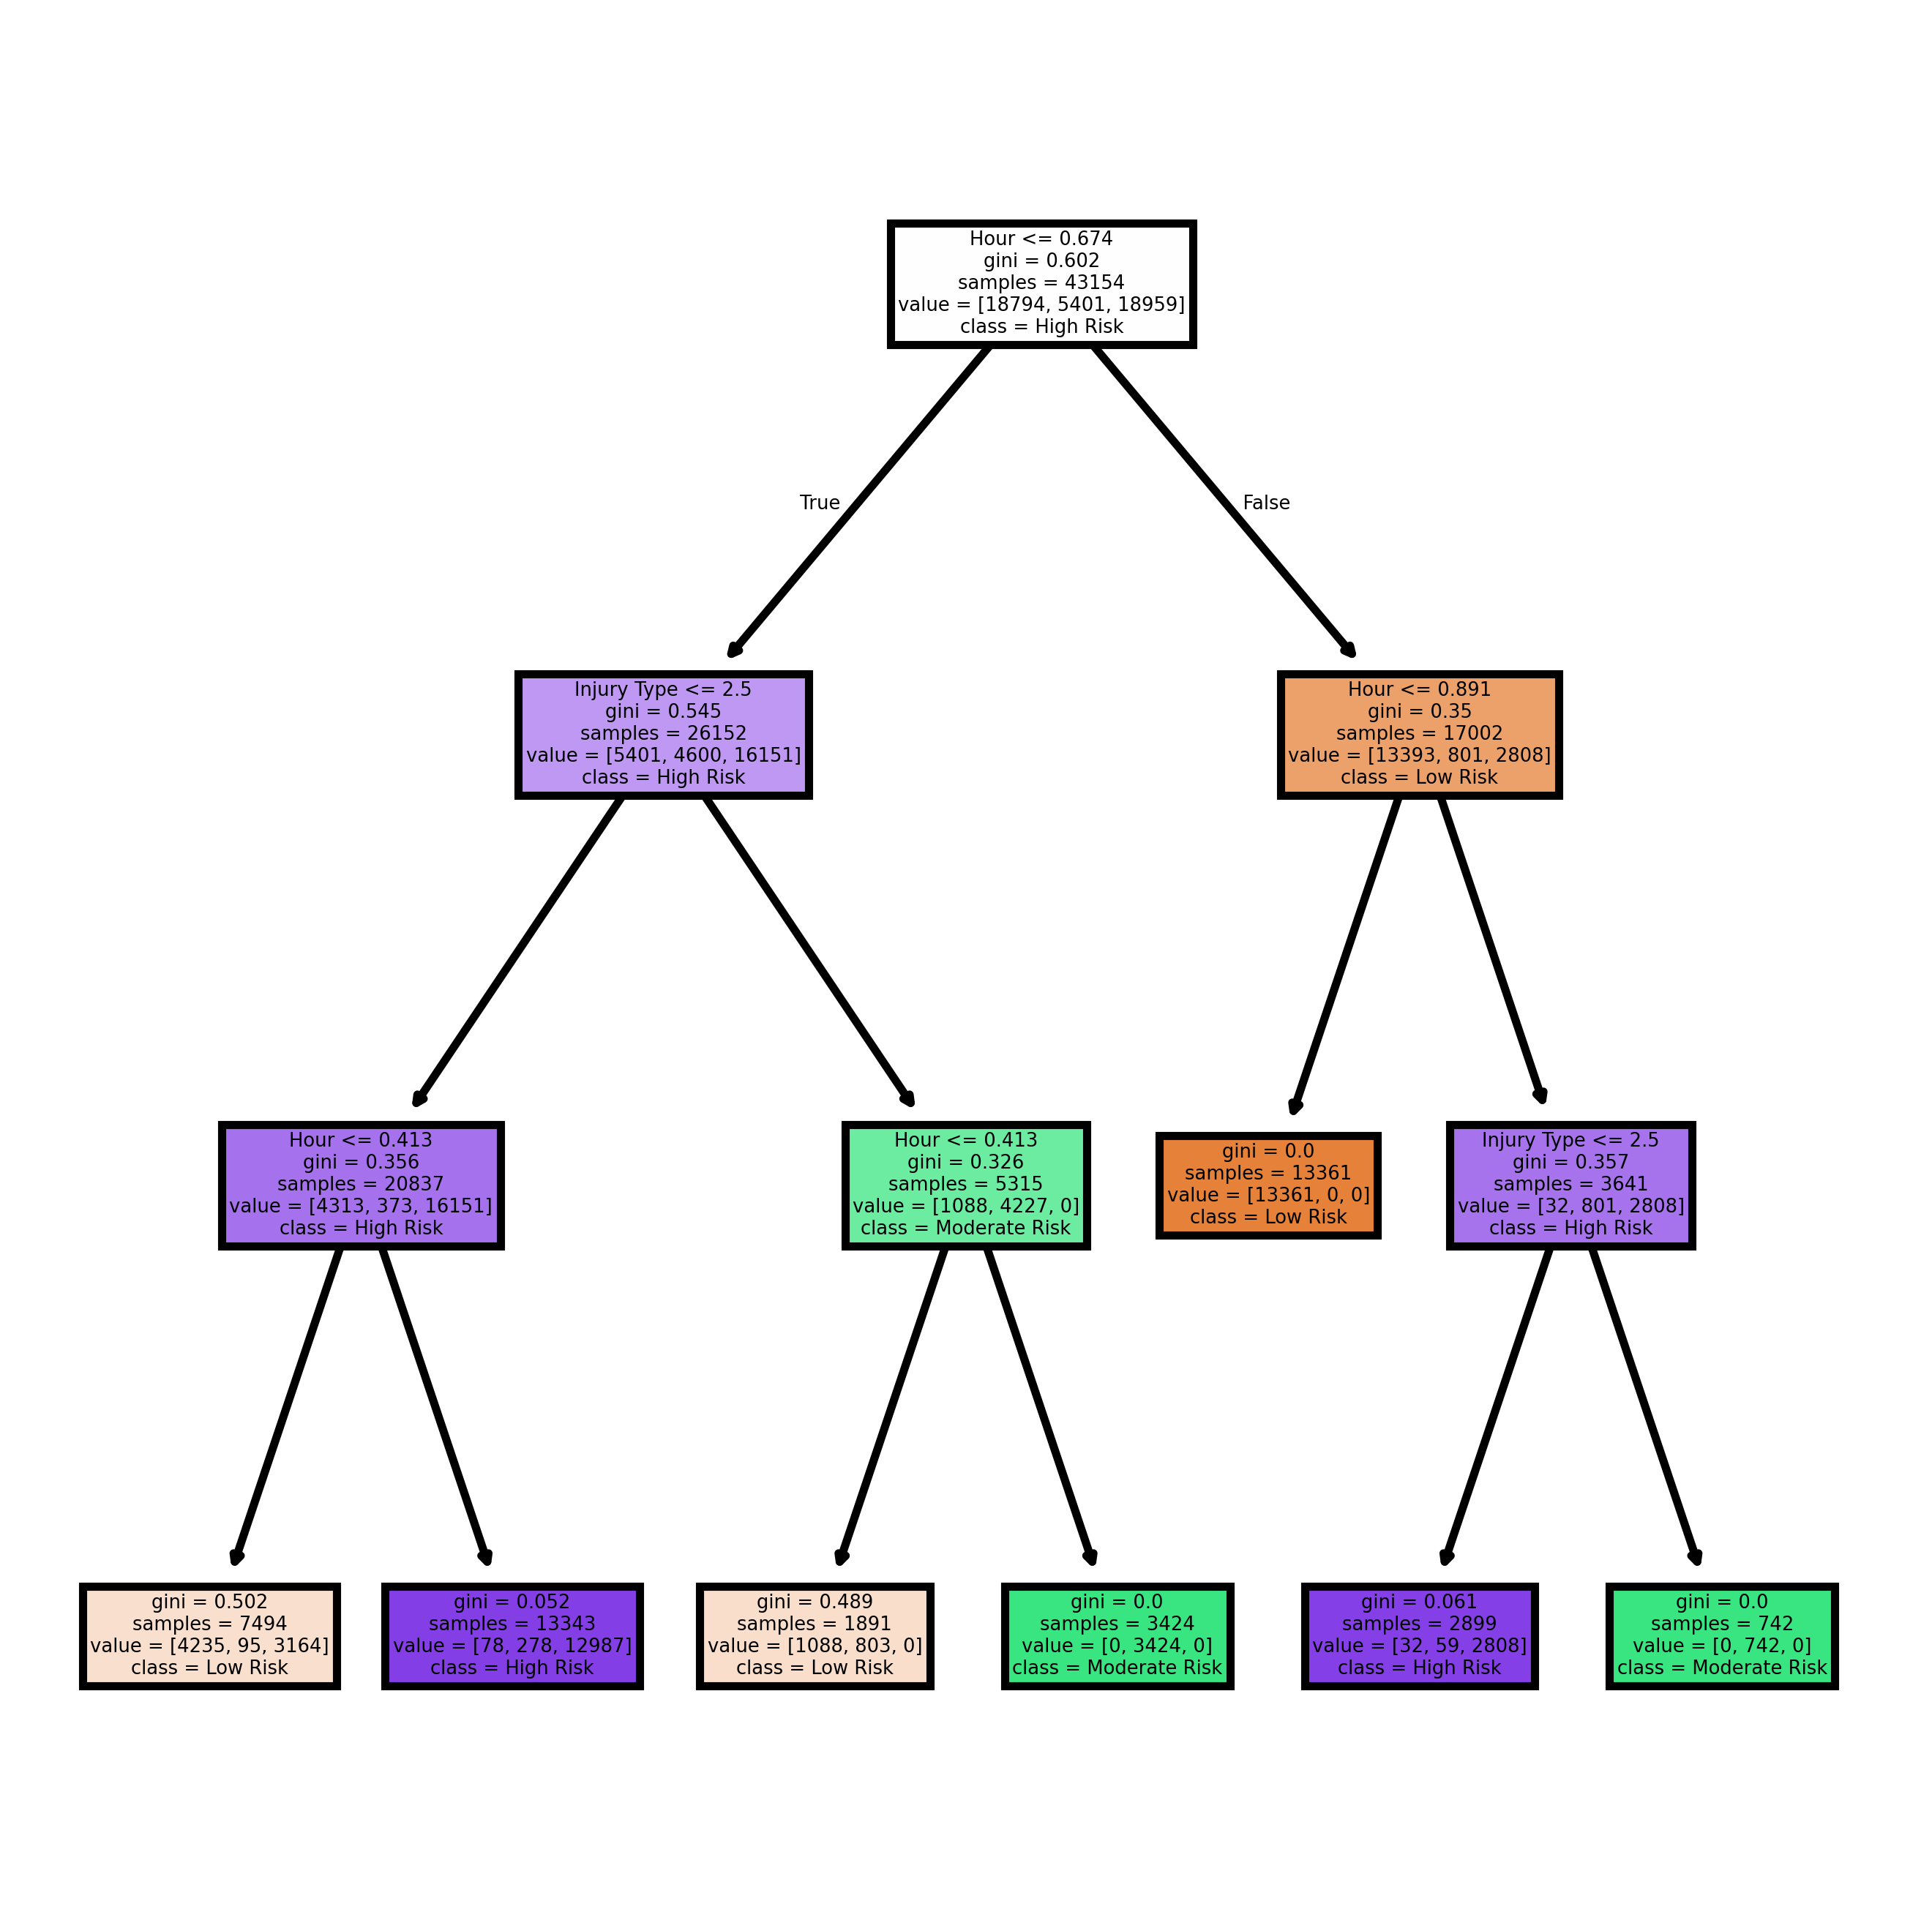

In [11]:
fn = ['Year', 'Month', 'Day', 'Weekend?','Hour', 'Collision Type', 'Injury Type', 'Primary Factor', 'Latitude', 'Longitude', 'Hour_Bin'] #df column names without column risk level

cn = ["Low Risk", "Moderate Risk", "High Risk"]

fig, axes = plt.subplots(nrows = 1, figsize=(4, 4), dpi=800)
tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True)
plt.show()
#fig.savefig("")


Save and Predict using 80 - 20

In [12]:
filename_80 = 'decision_tree_model_80_20.sav'
pickle.dump(clf, open(filename_80, 'wb'))

loaded_model_80 = pickle.load(open(filename_80, 'rb'))
predictions_80 = loaded_model_80.predict(X_test)
print("Predictions for 80-20 split test data:\n", predictions_80)

Predictions for 80-20 split test data:
 ['High Risk' 'High Risk' 'High Risk' ... 'Low Risk' 'Moderate Risk'
 'Low Risk']


### Gini 90 - 10 split

In [13]:
# Splitting data into 90% train and 10% test
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

# Initialize the Decision Tree classifier with Gini index
clf = DecisionTreeClassifier(random_state=1 , max_depth=3)
# Train the model
clf.fit(X_train, y_train)
# Predict on the test set
y_pred = clf.predict(X_test)

# Display results
print("Gini Index Results (90-10 split):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Gini Index Results (90-10 split):
Accuracy: 0.8930491195551437
Classification Report:
                precision    recall  f1-score   support

    High Risk       0.81      1.00      0.90      2314
     Low Risk       1.00      0.78      0.87       682
Moderate Risk       0.97      0.83      0.89      2399

     accuracy                           0.89      5395
    macro avg       0.93      0.87      0.89      5395
 weighted avg       0.91      0.89      0.89      5395



Confusion matrix for 90 - 10

Training set size: 48548
Testing set size: 5395
Original dataset size: 53943
Confusion Matrix:
 [[2307    0    7]
 [ 108  530   44]
 [ 418    0 1981]]


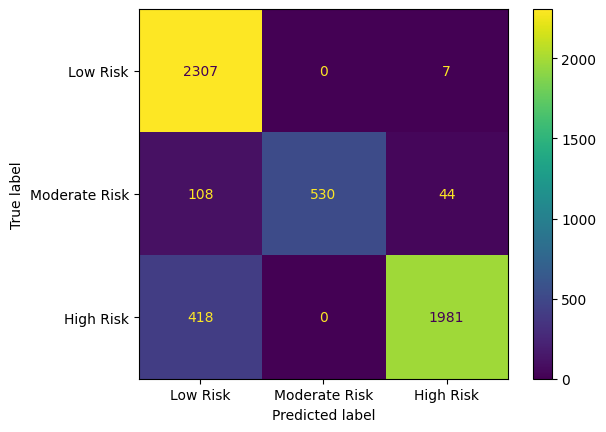

In [14]:
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("Original dataset size:", df.shape[0])

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn )

### Interpretation of Each Entry in confuison matrix:

- **2307:** True Positives for Class **'Low Risk'** (correctly predicted as **'Low Risk'**).
- **7:** Class **'Low Risk'** instances misclassified as **'High Risk'**.
- **108:** Class **'Moderate Risk'** instances misclassified as **'Low Risk'**.
- **530:** True Positives for Class **'Moderate Risk'** (correctly predicted as **'Moderate Risk'**).
- **44:** Class **'Moderate Risk'** instances misclassified as **'High Risk'**.
- **418:** Class **'High Risk'** instances misclassified as **'Low Risk'**.
- **1981:** True Positives for Class **'High Risk'** (correctly predicted as **'High Risk'**).


Desicion tree for 90 - 10

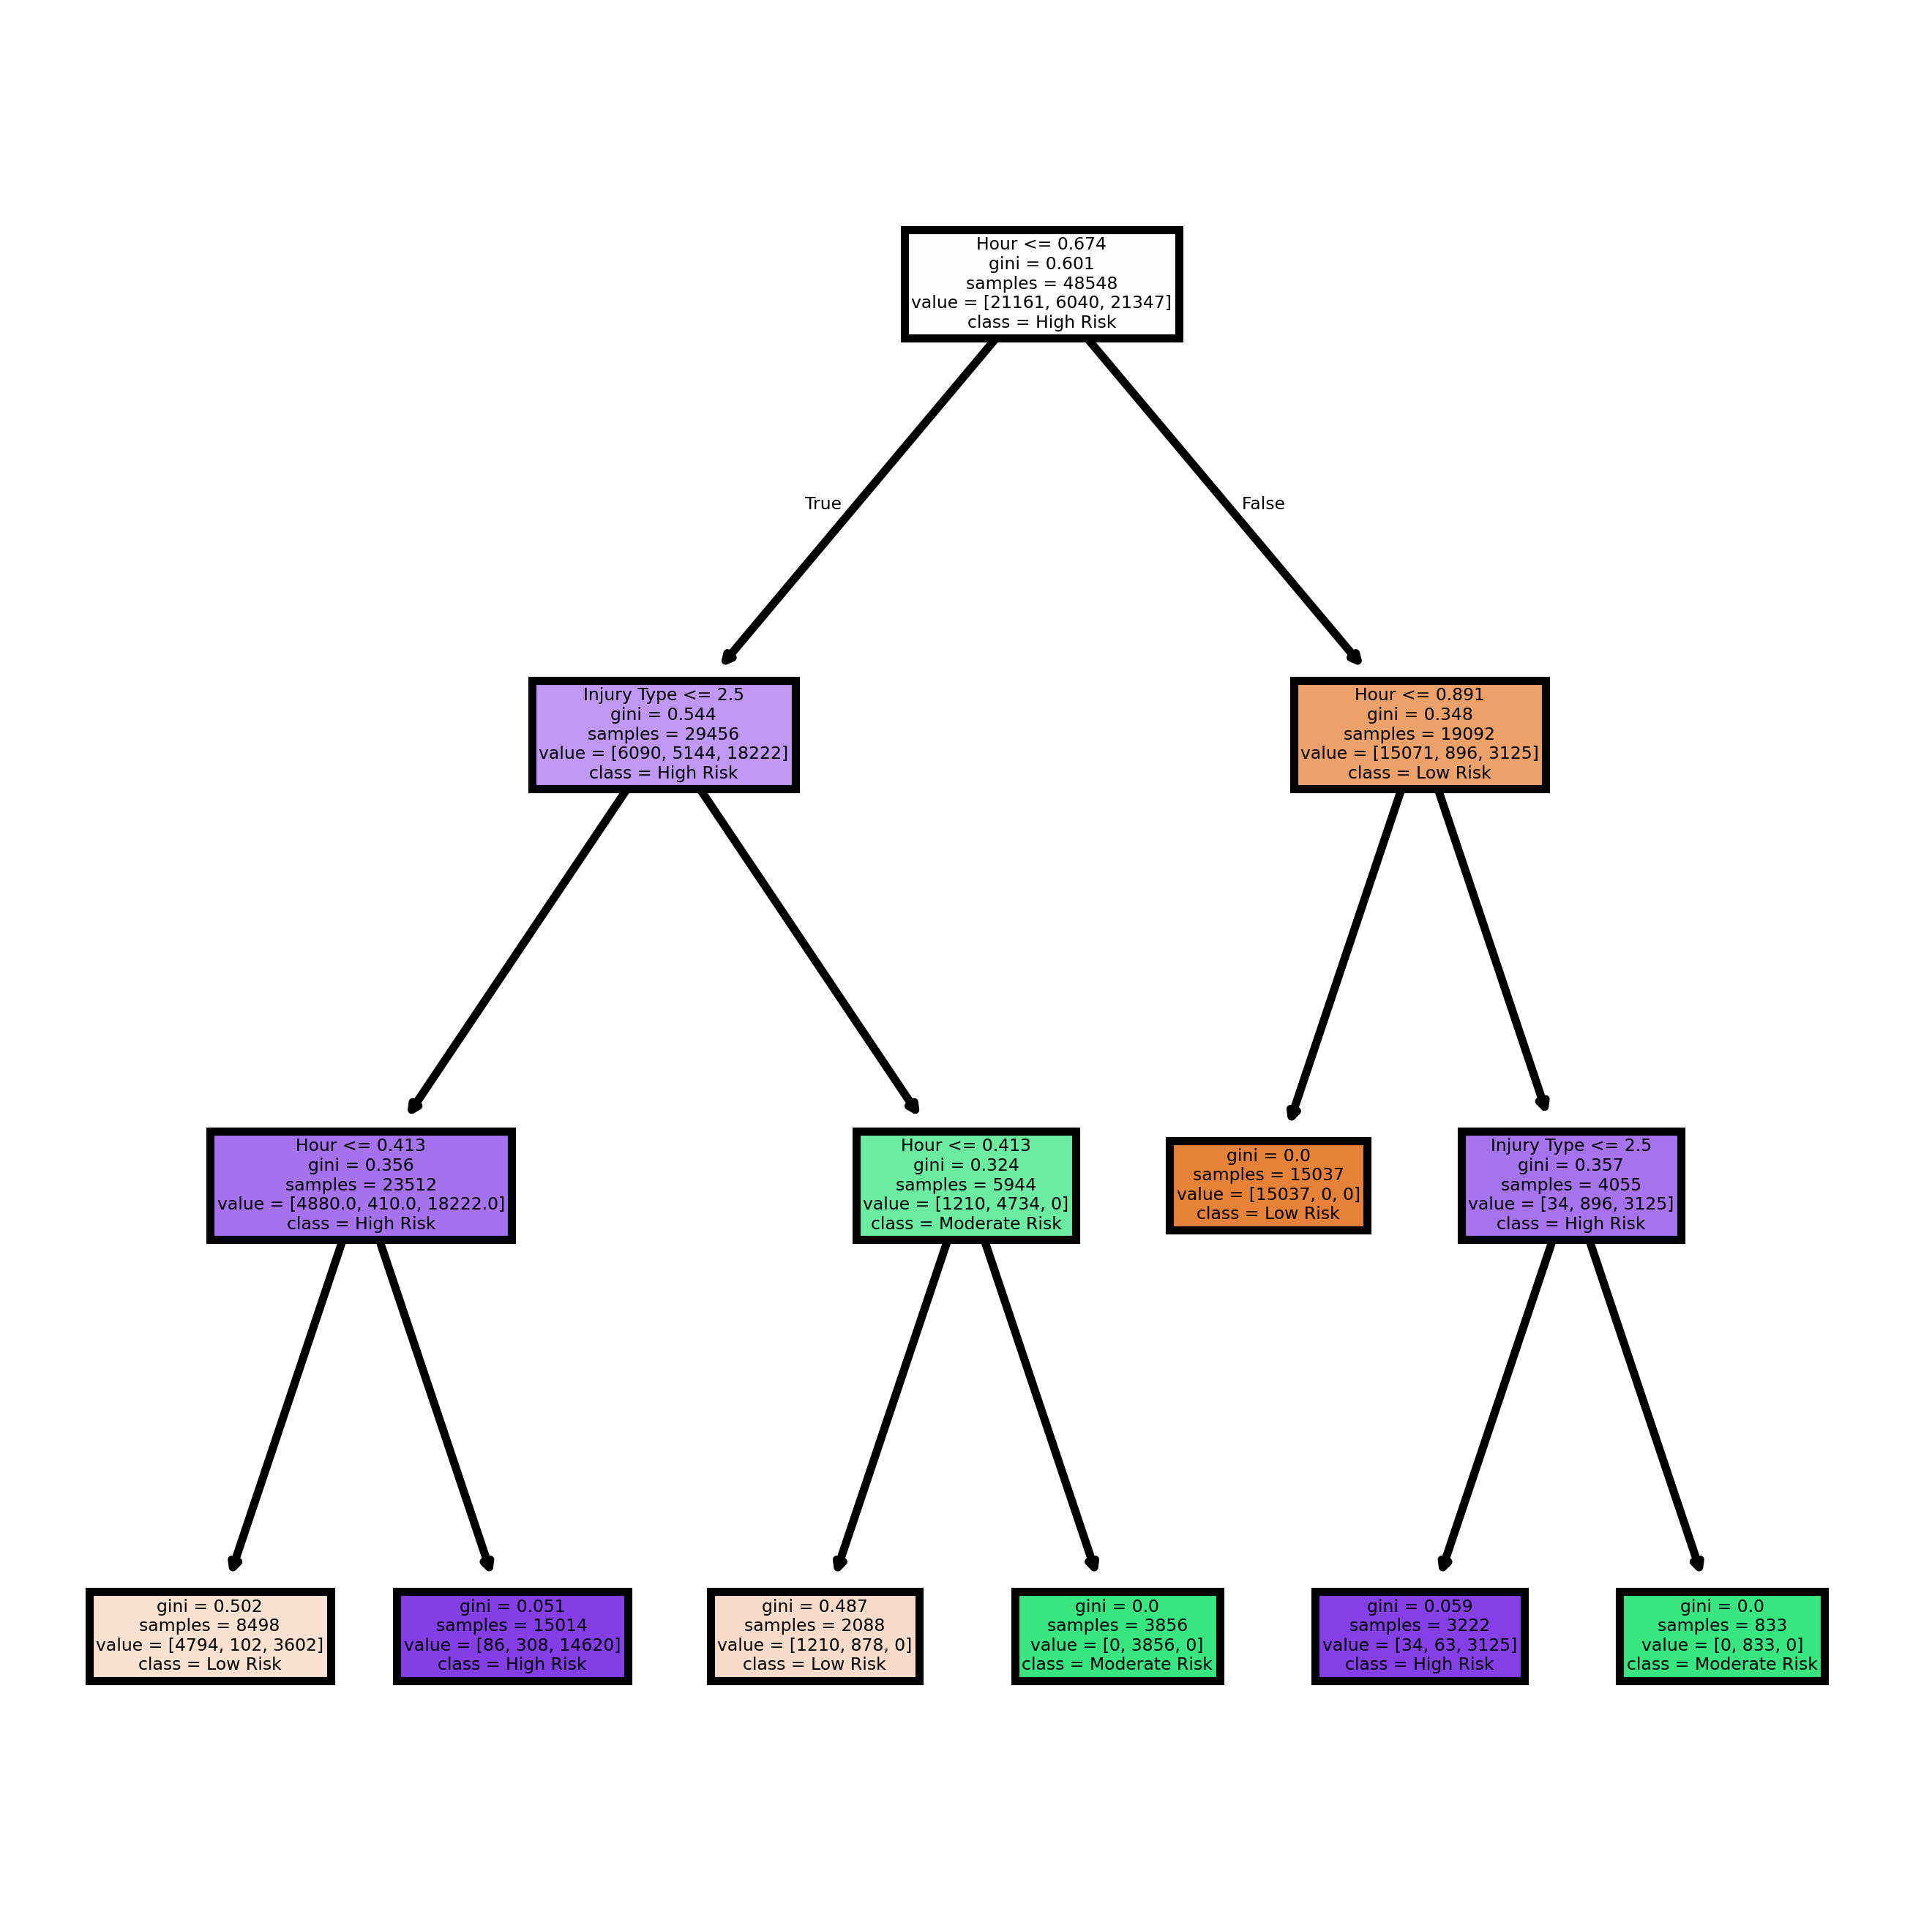

In [ ]:
fn = ['Year', 'Month', 'Day', 'Weekend?','Hour', 'Collision Type', 'Injury Type', 'Primary Factor', 'Latitude', 'Longitude', 'Hour_Bin'] #df column names without column risk level

cn = ["Low Risk", "Moderate Risk", "High Risk"]

fig, axes = plt.subplots(nrows = 1, figsize=(4, 4), dpi=800)
tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True)
plt.show()
#fig.savefig("")

Save and Predict using 90 - 10

In [16]:
filename_90 = 'decision_tree_model_90_10.sav'
pickle.dump(clf, open(filename_90, 'wb'))

loaded_model_90 = pickle.load(open(filename_90, 'rb'))
predictions_90 = loaded_model_90.predict(X_test)
print("Predictions for 90-10 split test data:\n", predictions_90)

Predictions for 90-10 split test data:
 ['High Risk' 'High Risk' 'High Risk' ... 'Moderate Risk' 'Low Risk'
 'Moderate Risk']


## 4. Training and Evaluation with Entropy
The steps for training and evaluating using the Entropy criterion are identical, with the exception of initializing the model:

#### 10/90 split

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree


#load data
df = pd.read_csv("Dataset/Processed_dataset.csv")

#split dataset in features and target variable
fn = ['Year', 'Month', 'Day', 'Weekend?','Hour', 'Collision Type', 'Injury Type', 'Primary Factor', 'Latitude', 'Longitude', 'Hour_Bin'] #df column names without column risk level
X = df[fn] # feature names
y = df['Risk Level'] # Target variable

#split dataset into training set and test set
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.1,random_state=1) # %10 test %90 training

#Create Decision Tree classifier Object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Train Decision Tree classifier
clf = clf.fit(X_train,y_train)

#predict the response for test Data
y_pred = clf.predict(X_test)

# Model Accuracy, How often is the classfier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8930491195551437


##### confusion matrix for enntropy 90/10 split

Confusion Matrix:

[[2307    0    7]
 [ 108  530   44]
 [ 418    0 1981]]


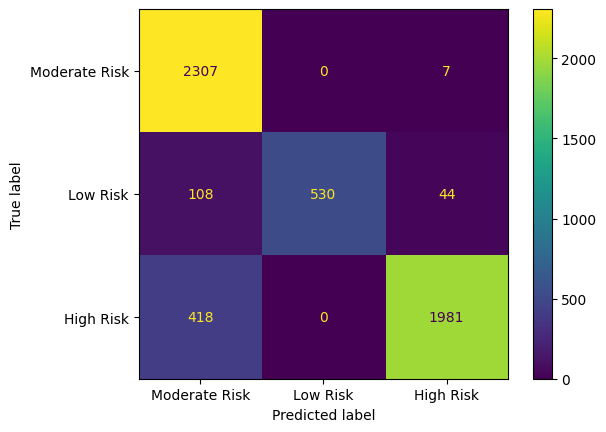

In [ ]:
print("Confusion Matrix:\n")

# Compute and print the confusion matirx 
cm = confusion_matrix(y_test,y_pred)
print(cm)

# classes_names
cn = df['Risk Level'].unique()

#create confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)



### Interpretation of Each Entry in Confusion Matrix:

- **2307:** True Positives for Class **'Moderate Risk'** (correctly predicted as **'Moderate Risk'**).
- **7:** Class **'Moderate Risk'** instances misclassified as **'High Risk'**.
- **108:** Class **'Low Risk'** instances misclassified as **'Moderate Risk'**.
- **530:** True Positives for Class **'Low Risk'** (correctly predicted as **'Low Risk'**).
- **44:** Class **'low Risk'** instances misclassified as **'High Risk'**.
- **418:** Class **'High Risk'** instances misclassified as **'moderate Risk'**.
- **1981:** True Positives for Class **'High Risk'** (correctly predicted as **'High Risk'**).


##### decision tree for enntropy 90/10 split

predictions for test data: 
 ['High Risk' 'High Risk' 'High Risk' ... 'Moderate Risk' 'Low Risk'
 'Moderate Risk']


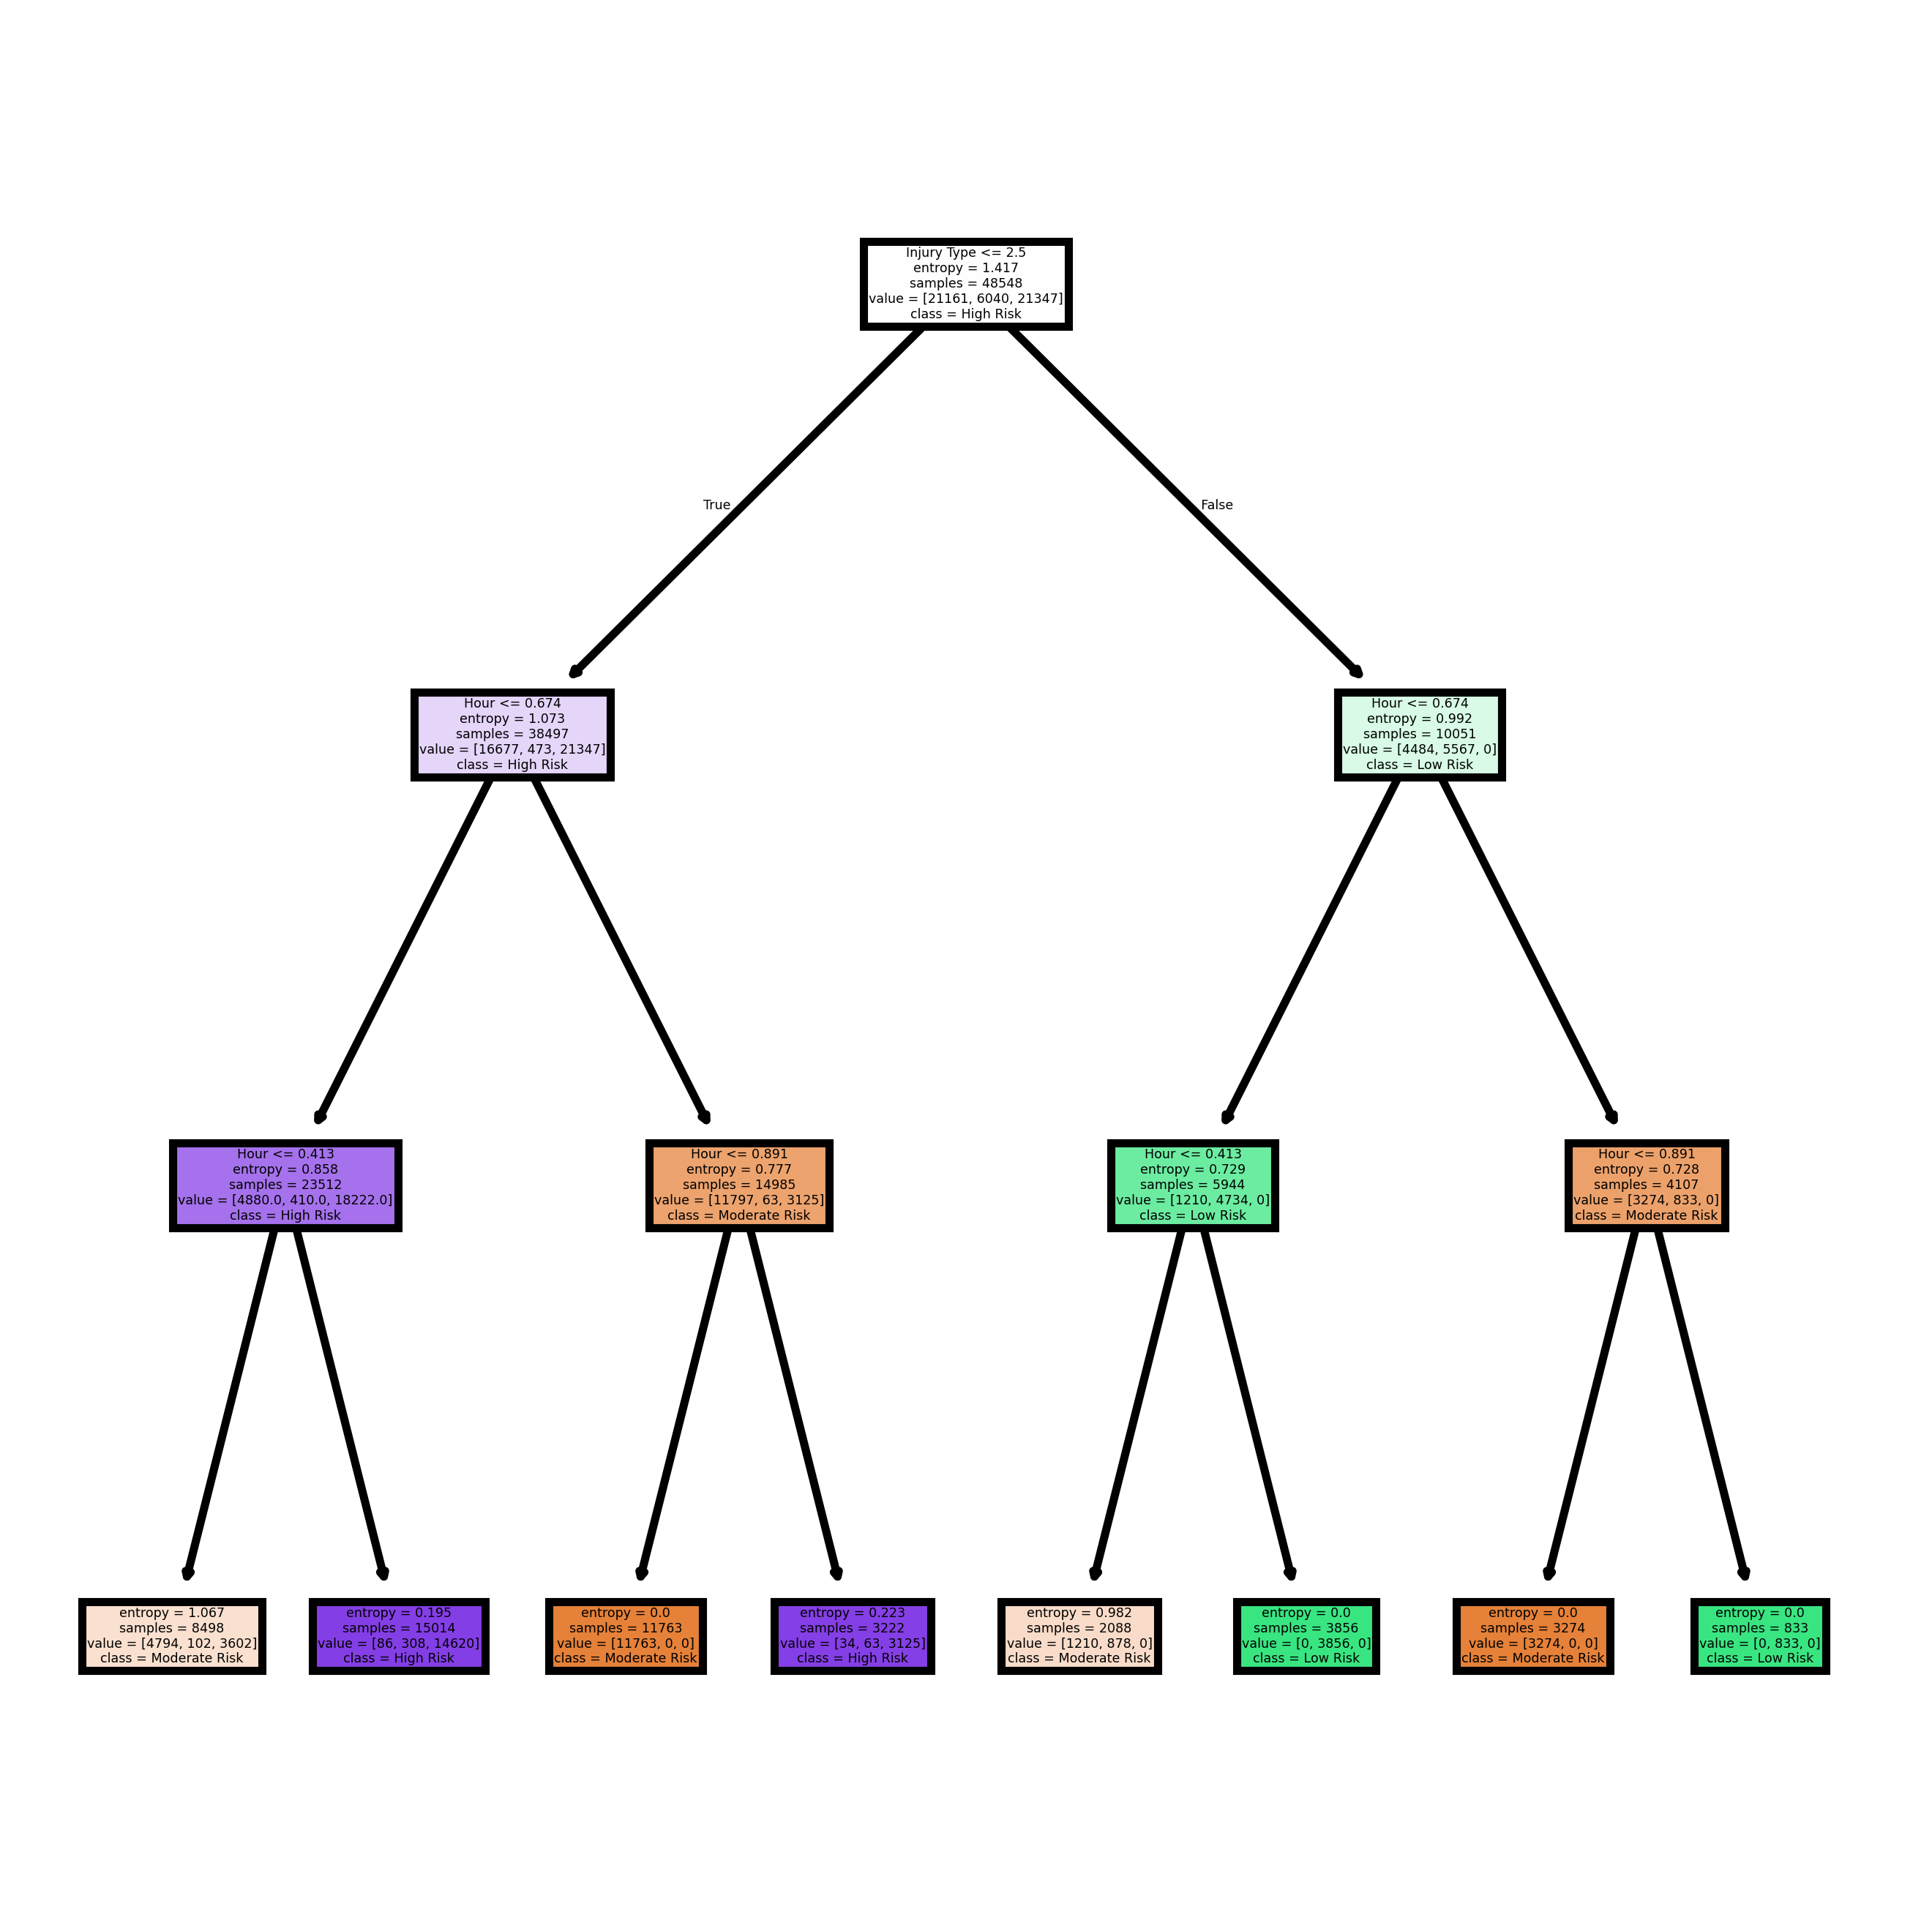

In [19]:
# setting dpi =800 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, figsize=(4,4), dpi=800)

tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True);

import pickle
# save your model to a file
filename = 'decision_tree_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# load  model from a file
loaded_model = pickle.load(open(filename,'rb'))

# Make predictions with the model on test data
predictions = loaded_model.predict(X_test)
print("predictions for test data: \n",predictions)


#### entropy 80/20 split

In [20]:
#split dataset into training set and test set
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=1) # %20 test %80 training

#Create Decision Tree classifier Object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Train Decision Tree classifier
clf = clf.fit(X_train,y_train)

#predict the response for test Data
y_pred = clf.predict(X_test)

# Model Accuracy, How often is the classfier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))


Accuracy: 0.8942441375475021


##### confusion matrix for enntropy 80/20 split

Confusion Matrix:

[[2307    0    7]
 [ 108  530   44]
 [ 418    0 1981]]


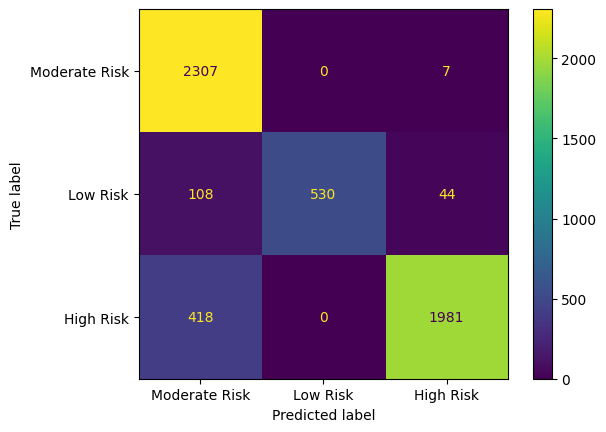

In [7]:
print("Confusion Matrix:\n")
# Compute and print the confusion matirx 
cm = confusion_matrix(y_test,y_pred)
print(cm)

# classes_names
cn = df['Risk Level'].unique()

#create confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)

### Interpretation of Each Entry in Confusion Matrix:

- **2307:** True Positives for Class **'Moderate Risk'** (correctly predicted as **'Moderate Risk'**).
- **7:** Class **'Moderate Risk'** instances misclassified as **'High Risk'**.
- **108:** Class **'Low Risk'** instances misclassified as **'Moderate Risk'**.
- **530:** True Positives for Class **'Low Risk'** (correctly predicted as **'Low Risk'**).
- **44:** Class **'Low Risk'** instances misclassified as **'High Risk'**.
- **418:** Class **'High Risk'** instances misclassified as **'Moderate Risk'**.
- **1981:** True Positives for Class **'High Risk'** (correctly predicted as **'High Risk'**).


##### decisionn tree for enntropy 80/20 split

predictions for test data: 
 ['High Risk' 'High Risk' 'High Risk' ... 'Low Risk' 'Moderate Risk'
 'Low Risk']


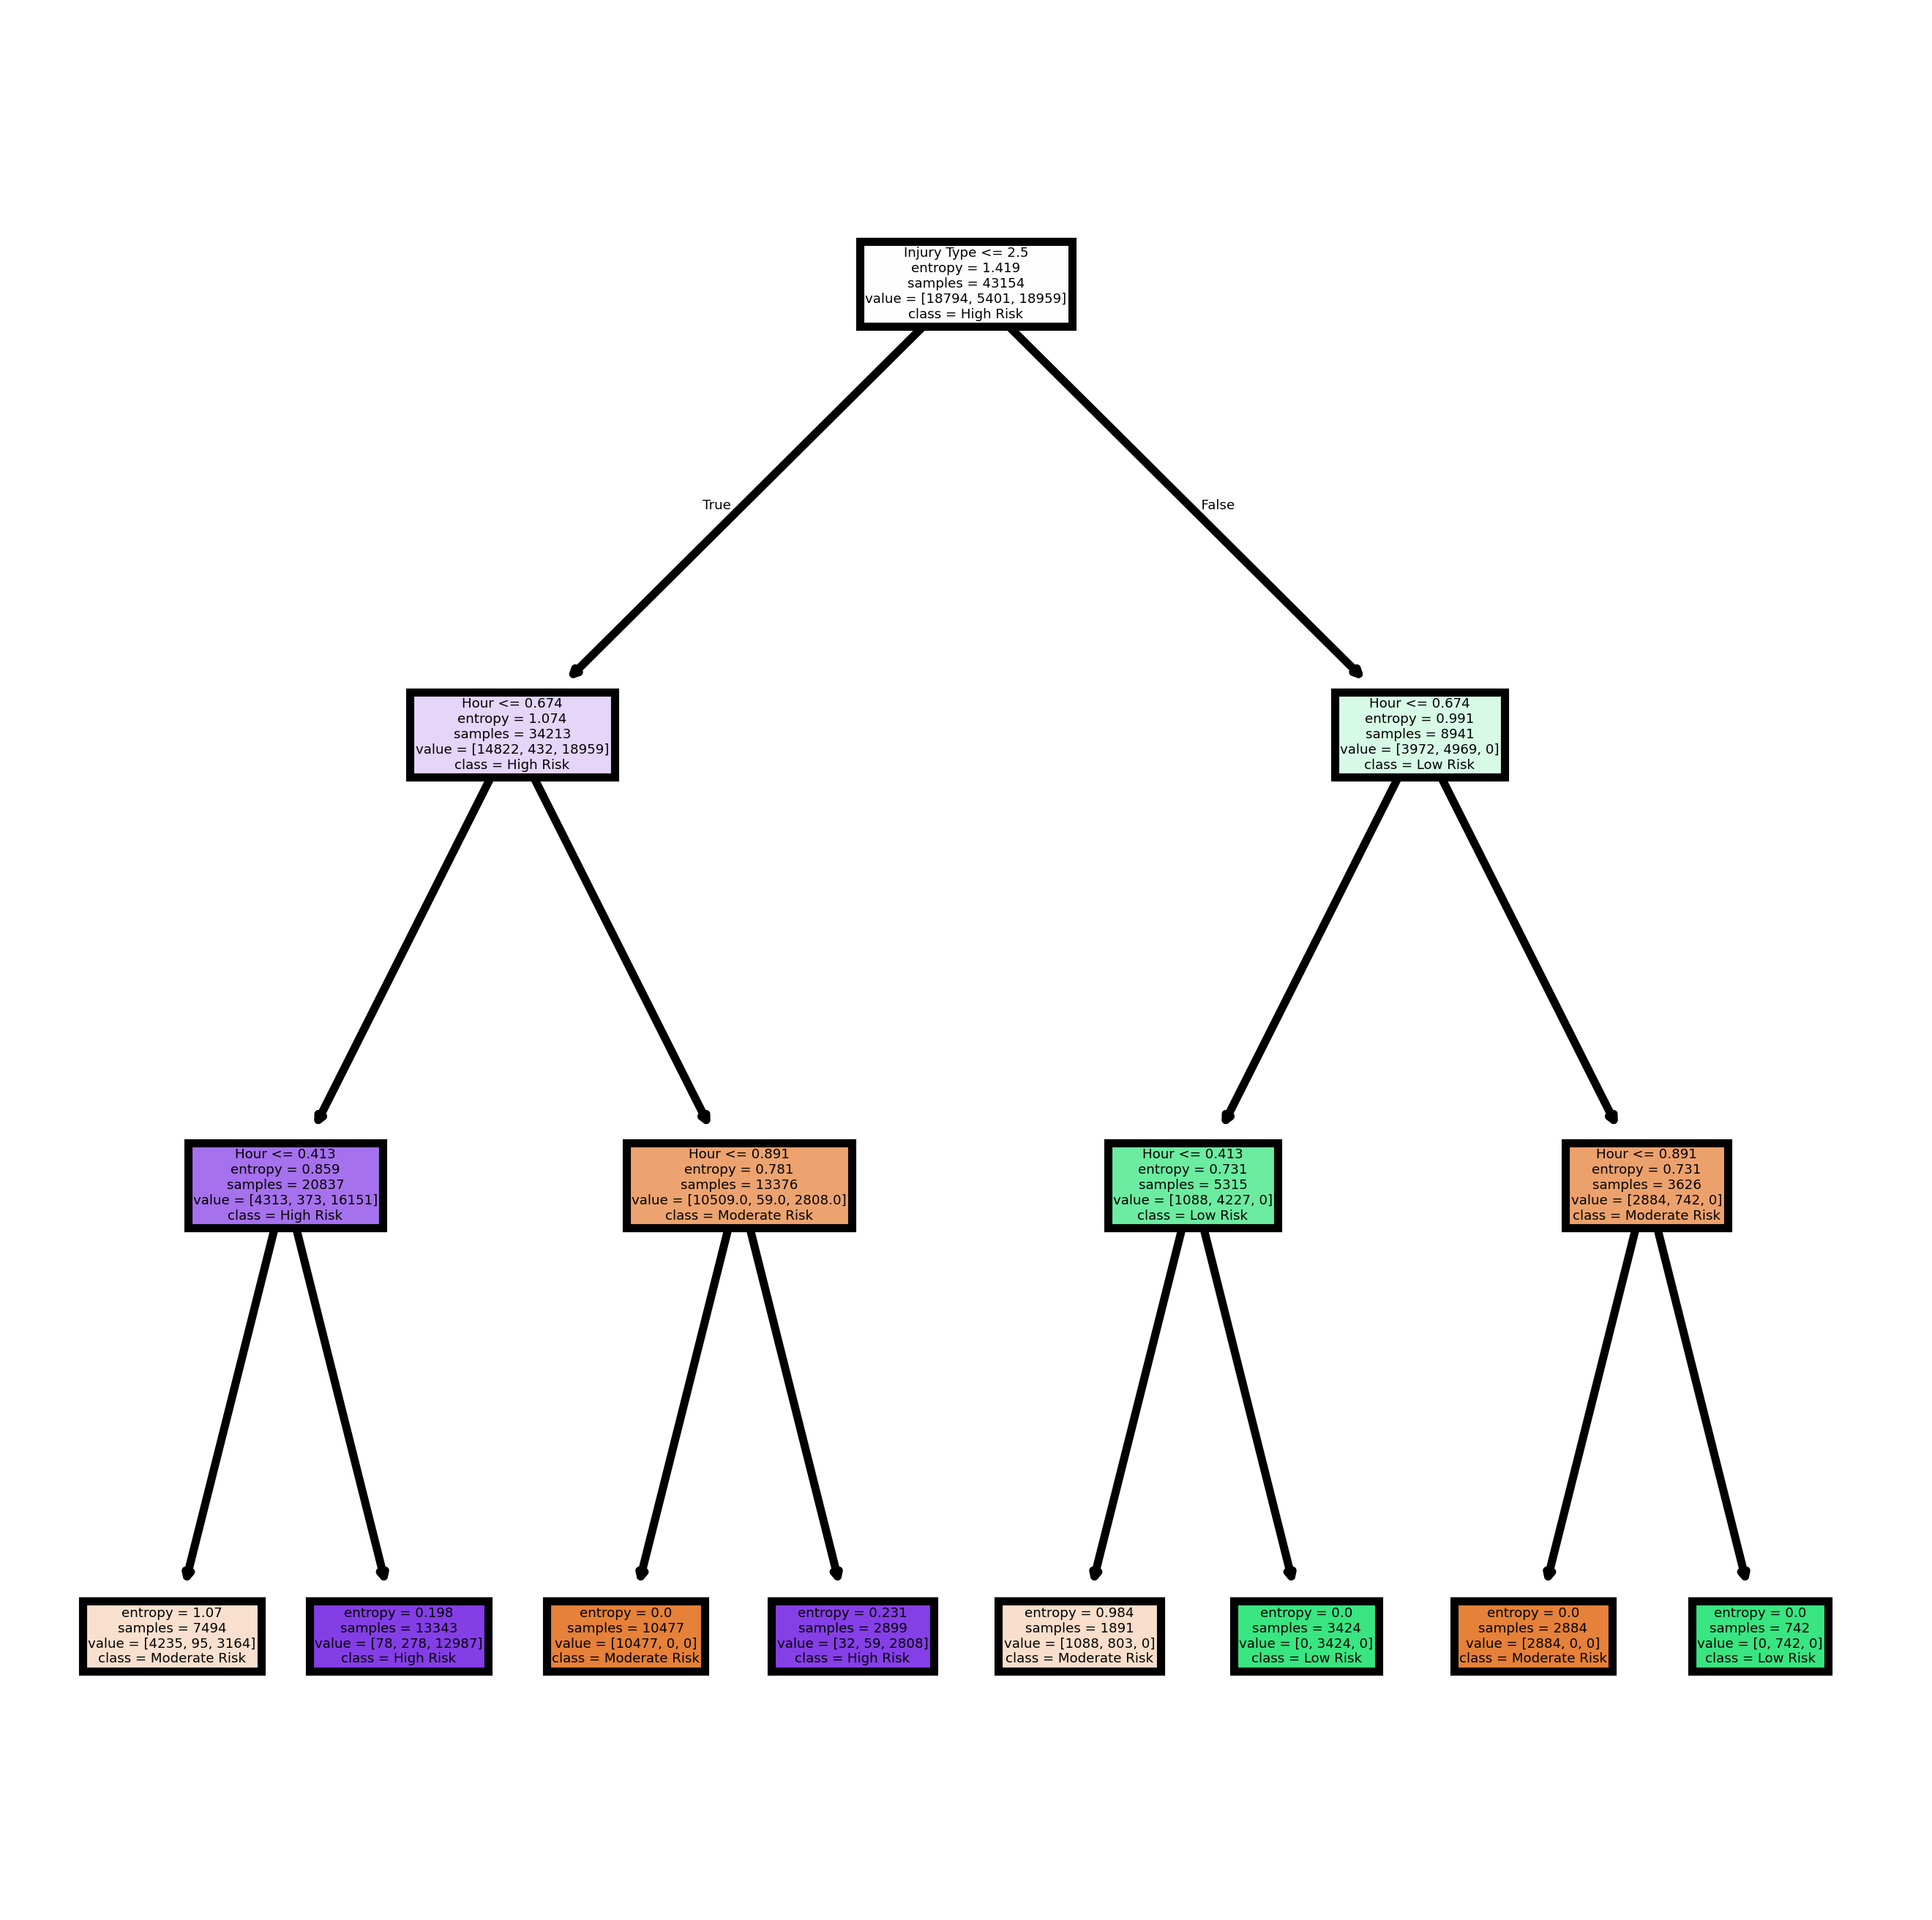

In [22]:

# setting dpi =800 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, figsize=(4,4), dpi=800)

tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True);

import pickle
# save your model to a file
filename = 'decision_tree_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# load  model from a file
loaded_model = pickle.load(open(filename,'rb'))

# Make predictions with the model on test data
predictions = loaded_model.predict(X_test)
print("predictions for test data: \n",predictions)

#### entropy 70/30 split

In [23]:
#split dataset into training set and test set
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.3,random_state=1) # %30 test %70 training

#Create Decision Tree classifier Object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#Train Decision Tree classifier
clf = clf.fit(X_train,y_train)

#predict the response for test Data
y_pred = clf.predict(X_test)

# Model Accuracy, How often is the classfier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))


Accuracy: 0.8942717666687264


##### connfusion matrix for enntropy 70/30 split

Confusion Matrix:

[[2307    0    7]
 [ 108  530   44]
 [ 418    0 1981]]


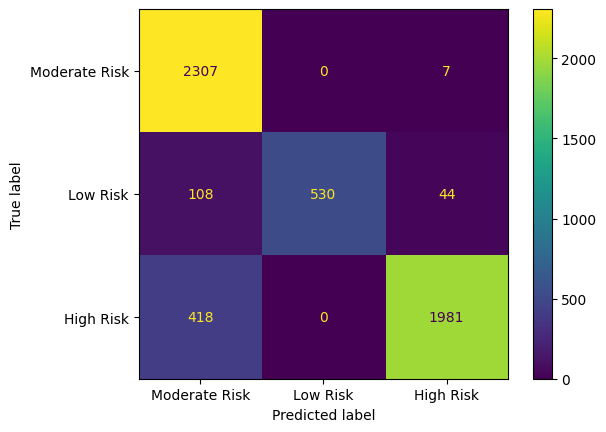

In [8]:
print("Confusion Matrix:\n")

# Compute and print the confusion matirx 
cm = confusion_matrix(y_test,y_pred)
print(cm)

# classes_names
cn = df['Risk Level'].unique()

#create confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)


### Interpretation of Each Entry in Confusion Matrix:

- **2307:** True Positives for Class **'Moderate Risk'** (correctly predicted as **'Moderate Risk'**).
- **7:** Class **'Moderate Risk'** instances misclassified as **'High Risk'**.
- **108:** Class **'Low Risk'** instances misclassified as **'Moderate Risk'**.
- **530:** True Positives for Class **'Low Risk'** (correctly predicted as **'Low Risk'**).
- **44:** Class **'Low Risk'** instances misclassified as **'High Risk'**.
- **418:** Class **'High Risk'** instances misclassified as **'Moderate Risk'**.
- **1981:** True Positives for Class **'High Risk'** (correctly predicted as **'High Risk'**).


##### decision tree for entropy 70/30 split

predictions for test data: 
 ['High Risk' 'High Risk' 'High Risk' ... 'Low Risk' 'High Risk'
 'High Risk']


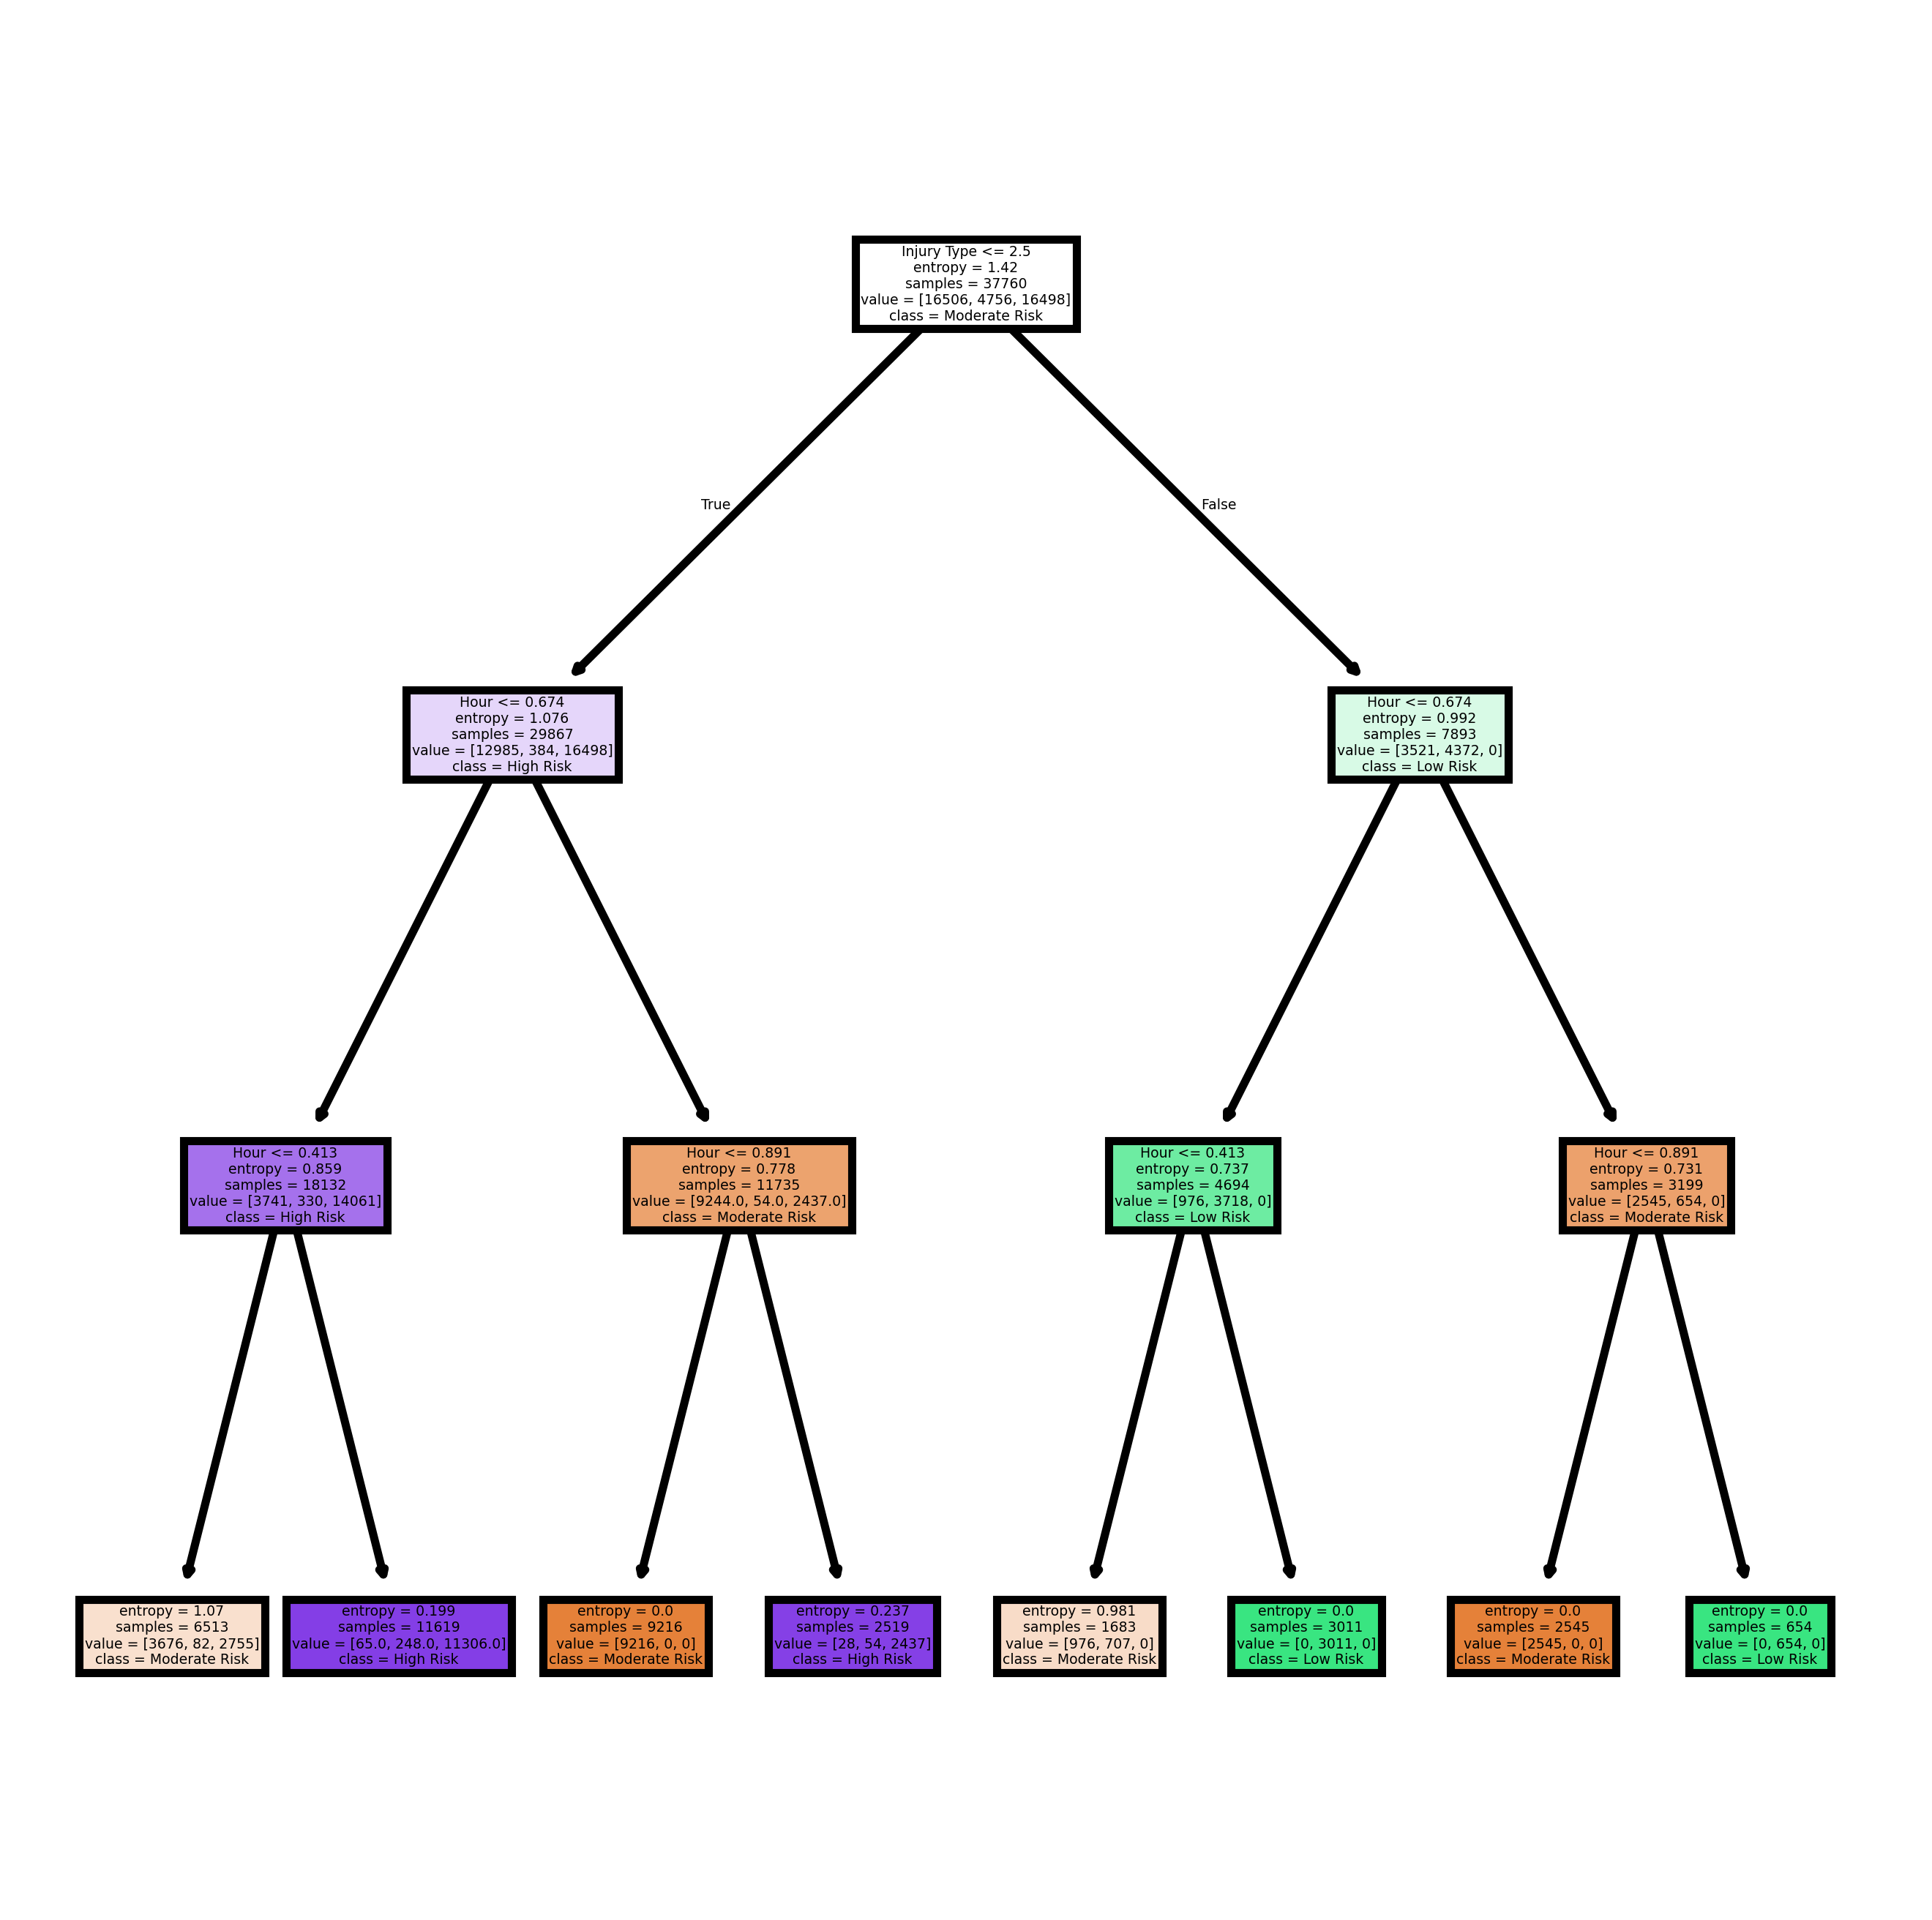

In [25]:

# setting dpi =800 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, figsize=(4,4), dpi=800)

tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True);

# save your model to a file
filename = 'decision_tree_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# load  model from a file
loaded_model = pickle.load(open(filename,'rb'))

# Make predictions with the model on test data
predictions = loaded_model.predict(X_test)
print("predictions for test data: \n",predictions)

# 5. Comparison of Splits and Criteria

We repeat the training and evaluation for splits of 80-20 and 90-10 for both Gini and Entropy. Below is a summary of the accuracy results:

| **Split (%)** | **Criterion** | **Accuracy** |
|---------------|---------------|--------------|
| 70-30         | Gini          | 89.43%       |
| 70-30         | Entropy       | 89.43%       |
| 80-20         | Gini          | 89.42%       |
| 80-20         | Entropy       | 89.42%       |
| 90-10         | Gini          | 89.30%       |
| 90-10         | Entropy       | 89.30%       |

---

# 6. Key Observations

### **1. Accuracy Consistency Across Criteria**
- Both Gini and Entropy criteria consistently yield similar results, with only minor variations across splits.

### **2. Insights from the Confusion Matrix**
- The **diagonal elements** of the matrix represent correctly classified instances, reflecting high precision.
- The **off-diagonal elements** show misclassifications, which may point to areas for potential model improvement.

### **3. Influence of Data Splits on Performance**
- Larger training datasets, such as in the 90-10 split, slightly improve rare-class accuracy. However, the overall performance across splits remains robust (~89%).

### Future Improvements
- Investigate the impact of feature engineering on model performance.
- Experiment with ensemble methods to assess potential accuracy gains.

---

it demonstrates the application of Decision Trees for classification using a structured approach, including comparisons across splits and splitting criteria. The model achieves high accuracy (~89%) across various configurations, showing robustness in performance.


# Part 2 Clustering Analysis for Processed Dataset
it will performs clustering on a preprocessed dataset using K-Means and evaluates the results using various techniques.



We use K-Means clustering, a method that partitions the data into K clusters, aiming to minimize the within-cluster variance. K-Means was chosen for its efficiency and simplicity in identifying natural groupings in the data.

#### Elbow Method
To determine the optimal number of clusters, we apply the **Elbow Method**. This method involves plotting the sum of squared distances (inertia) for different values of K. The 'elbow' point on the plot, where the inertia starts to level off, indicates the optimal K.

#### Silhouette Score
We also use the **Silhouette Score** to evaluate the quality of the clusters. The silhouette score ranges from -1 to 1, with values closer to 1 indicating well-separated and cohesive clusters. This score will help confirm the results obtained from the Elbow Method.

---

### 1. Load and Explore the Dataset

In [26]:
import pandas as pd 
import matplotlib.pyplot as plt 
data = pd.read_csv("Dataset/Processed_dataset.csv", encoding="windows-1252")  
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53943 non-null  int64  
 4   Hour               53943 non-null  float64
 5   Collision Type     53943 non-null  int64  
 6   Injury Type        53943 non-null  int64  
 7   Primary Factor     53943 non-null  int64  
 8   Reported_Location  53943 non-null  int64  
 9   Latitude           53943 non-null  float64
 10  Longitude          53943 non-null  float64
 11  Risk Level         53943 non-null  object 
 12  Hour_Bin           53943 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 5.4+ MB
None


- Dataset Summary:
   - Rows: 53,943
   - Columns: 13
   - No missing values.

---

### 2. Feature Scaling
Objective:
Scale all features to have a mean of 0 and a standard deviation of 1.

To prepare for clustering, we removed the target variable, 'Risk Level,' and standardized the remaining features. Standard scaling was applied to ensure that each feature contributes equally to the clustering algorithm.

Below is the head of the scaled dataset:

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Remove class label for clustering
features = data.drop(columns=['Risk Level'])

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows to confirm scaling
print("\nScaled DataFrame:")
print(scaled_data.head())


Scaled DataFrame:
       Year     Month       Day  Weekend?      Hour  Collision Type  \
0  1.591657 -1.611041  0.420592 -0.571221 -2.539427       -0.058135   
1  1.591657 -1.611041  0.944311 -0.571221  0.287886       -0.058135   
2  1.591657 -1.611041  0.944311  1.750636  1.795786       -0.058135   
3  1.591657 -1.611041  1.468030  1.750636 -0.843039       -0.058135   
4  1.591657 -1.611041  1.468030  1.750636 -0.466064       -0.058135   

   Injury Type  Primary Factor  Reported_Location  Latitude  Longitude  \
0    -0.404883        0.330961          -1.339926  0.316932  -0.316895   
1    -0.404883       -0.698938          -1.287891  0.317130  -0.317254   
2     1.819890       -1.085150          -0.815059  0.316097  -0.318619   
3     1.819890       -0.763306           0.200040  0.317503  -0.318902   
4    -0.404883       -0.763306           1.585908  0.317432  -0.319049   

   Hour_Bin  
0  2.045609  
1 -0.933502  
2  0.059535  
3  1.052572  
4  1.052572  


- Standardize feature values so that all attributes contribute equally to clustering.
- Attributes with larger scales (latitude/longitude) no longer dominate the clustering algorithm.


Normalize all features to have a mean of 0 and standard deviation of 1.


Scaling prevents features with larger ranges like `Latitude` from dominating smaller ones like `Hour`.
Ensures all attributes contribute equally to clustering.

---

### 3. Exploring Different Cluster Sizes (K)
#### Step 1: Apply K-Means for Different Values of K
### K = 4

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

np.random.seed(21)

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=4, random_state=21)
kmeans_result = kmeans.fit_predict(scaled_data)


print("Cluster Centers: ")
print(kmeans.cluster_centers_)  

print("\nCluster Labels: ")
print(kmeans.labels_) 


Cluster Centers: 
[[-2.13872095e-01  5.21067119e-02 -1.40346180e-02 -1.58436215e-03
  -2.18179517e-02 -1.24317086e-01 -1.23403093e-01  4.97332233e-02
   3.85128401e-02 -3.15146909e+00  3.15190938e+00  3.59772826e-02]
 [ 8.21914691e-03  2.32417821e-03 -2.74704555e-01 -3.82955385e-01
   4.99366423e-01  8.26172674e-02  2.95046868e-02 -5.08295798e-02
  -3.37589758e-02  3.17198297e-01 -3.17207501e-01 -6.50539247e-01]
 [ 5.87922177e-02 -2.62925378e-02 -1.47656104e-01 -1.37954853e-01
  -1.22806094e+00 -1.10573971e-01 -2.07073377e-02  6.64725741e-02
   4.07034231e-02  3.17033791e-01 -3.17196123e-01  1.33528908e+00]
 [-1.29841056e-04  6.77372262e-03  1.36006376e+00  1.75063634e+00
   4.92668323e-01 -1.70871836e-02  1.13330183e-02  3.19299631e-02
   2.41940010e-02  3.17080778e-01 -3.17029383e-01 -1.28594936e-01]]

Cluster Labels: 
[2 1 3 ... 0 0 0]


### K = 3


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

np.random.seed(21)

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=21)
kmeans_result = kmeans.fit_predict(scaled_data)


print("Cluster Centers: ")
print(kmeans.cluster_centers_)  

print("\nCluster Labels: ")
print(kmeans.labels_) 


Cluster Centers: 
[[-2.13872095e-01  5.21067119e-02 -1.40346180e-02 -1.58436215e-03
  -2.18179517e-02 -1.24317086e-01 -1.23403093e-01  4.97332233e-02
   3.85128401e-02 -3.15146909e+00  3.15190938e+00  3.59772826e-02]
 [ 6.01465191e-03  3.18355148e-03  4.02993401e-03 -1.34133821e-02
   5.49736956e-01  6.88126359e-02  2.65886657e-02 -3.90580231e-02
  -2.60998009e-02  3.17197633e-01 -3.17200624e-01 -6.08387927e-01]
 [ 5.52109148e-02 -2.35508226e-02 -4.27431610e-03  2.96455438e-02
  -1.18730439e+00 -1.09803729e-01 -1.83665442e-02  6.89741156e-02
   4.44052166e-02  3.16995184e-01 -3.17129244e-01  1.31019973e+00]]

Cluster Labels: 
[2 1 1 ... 0 0 0]


### K = 5

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

np.random.seed(21)

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=5, random_state=21)
kmeans_result = kmeans.fit_predict(scaled_data)


print("Cluster Centers: ")
print(kmeans.cluster_centers_)  

print("\nCluster Labels: ")
print(kmeans.labels_) 


Cluster Centers: 
[[-2.13872095e-01  5.21067119e-02 -1.40346180e-02 -1.58436215e-03
  -2.18179517e-02 -1.24317086e-01 -1.23403093e-01  4.97332233e-02
   3.85128401e-02 -3.15146909e+00  3.15190938e+00  3.59772826e-02]
 [-3.93785219e-01  1.36633625e-02 -2.26063540e-01 -4.18534914e-01
   4.73678265e-01  3.18388630e-01  4.11042206e-01 -4.30724386e-01
  -6.29590972e-01  3.17239152e-01 -3.17139786e-01 -6.27586898e-01]
 [ 4.26145572e-01 -6.88966538e-03 -3.24579587e-01 -3.47450018e-01
   5.03755530e-01 -1.29074806e-01 -3.45514214e-01  3.43638040e-01
   5.82073727e-01  3.17165352e-01 -3.17277815e-01 -6.41059062e-01]
 [-1.29841056e-04  6.77372262e-03  1.36006376e+00  1.75063634e+00
   4.92668323e-01 -1.70871836e-02  1.13330183e-02  3.19299631e-02
   2.41940010e-02  3.17080778e-01 -3.17029383e-01 -1.28594936e-01]
 [ 6.77650235e-02 -2.96135314e-02 -1.46820047e-01 -1.30996198e-01
  -1.23934353e+00 -1.51955367e-01 -5.05755309e-02  7.67776202e-02
   5.75376240e-02  3.17020377e-01 -3.17197327e-01  1.3

____
### 4. Evaluate Clustering Using Silhouette Analysis


- Silhouette analysis measures how similar each data point is to its own cluster (cohesion) compared to other clusters (separation). It helps to evaluate the quality of clustering.

- Steps:
   - Compute the silhouette coefficient for each data point.
       - Values range from -1 (incorrectly clustered) to 1 (perfect clustering).
       - A silhouette score near 0 indicates overlapping clusters.
   - Average the scores to determine the overall performance for each value of K.
   - Use visual tools like the SilhouetteVisualizer from Yellowbrick to assess the cluster distribution.

In [ ]:
%pip install yellowbrick

The average silhouette score for k=3 is: 0.18195072479886865


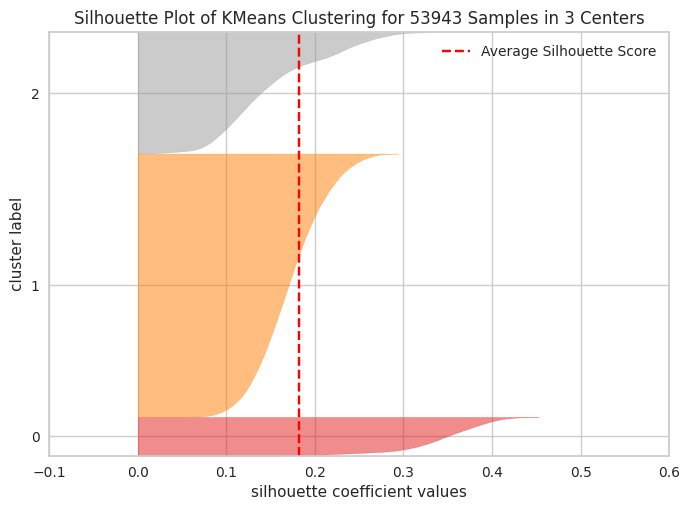

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'DejaVu Sans'  



# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

#Perform Silhouette Visualization (k=3, k=4, k=5)
k_values = [3, 4, 5]

for k in k_values:
    # Initialize the KMeans model with the current k value
    kmeans = KMeans(n_clusters=k, random_state=21)
    
    # Create a SilhouetteVisualizer object using KMeans and the current k value
    visualizer = SilhouetteVisualizer(kmeans, color="yellowbrick")
    
    
    visualizer.fit(scaled_data)  
    
    # Print the average silhouette score for the current k value
    print(f"The average silhouette score for k={k} is:", visualizer.silhouette_score_)
    
    # Show the silhouette plot for the current k value
    visualizer.show()


- Output and Observations:
   - The silhouette plot shows how well-separated the clusters are.
   - A higher average silhouette score indicates better-defined clusters.
   - Look for the K value where clusters are well-separated and have minimal overlap.
   - Silhouette scores indicate cluster cohesion and separation.
   - The best K value is determined by the highest average score.

---

### 5. Visualize Clusters with Centroids

- After determining potential values of K, visualize how the clusters are distributed in the dataset. Include cluster centroids to highlight the "center" of each cluster.

- Steps:
  - Fit K-Means for each value of K.
  - Add cluster labels to the dataset.
  - Plot a 2D scatter plot (use the first two principal features for simplicity).
  - Overlay cluster centroids on the plot.


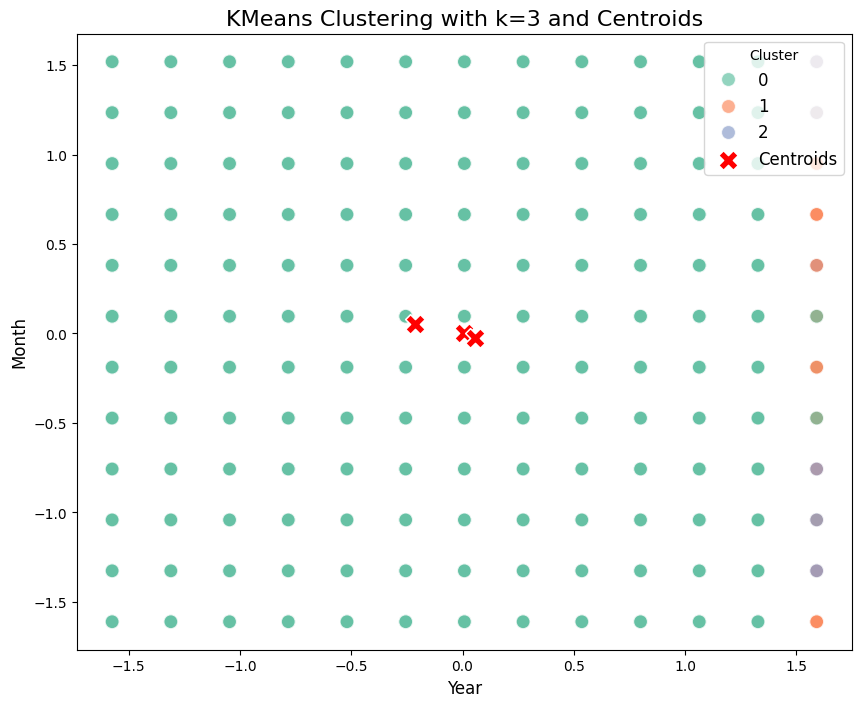

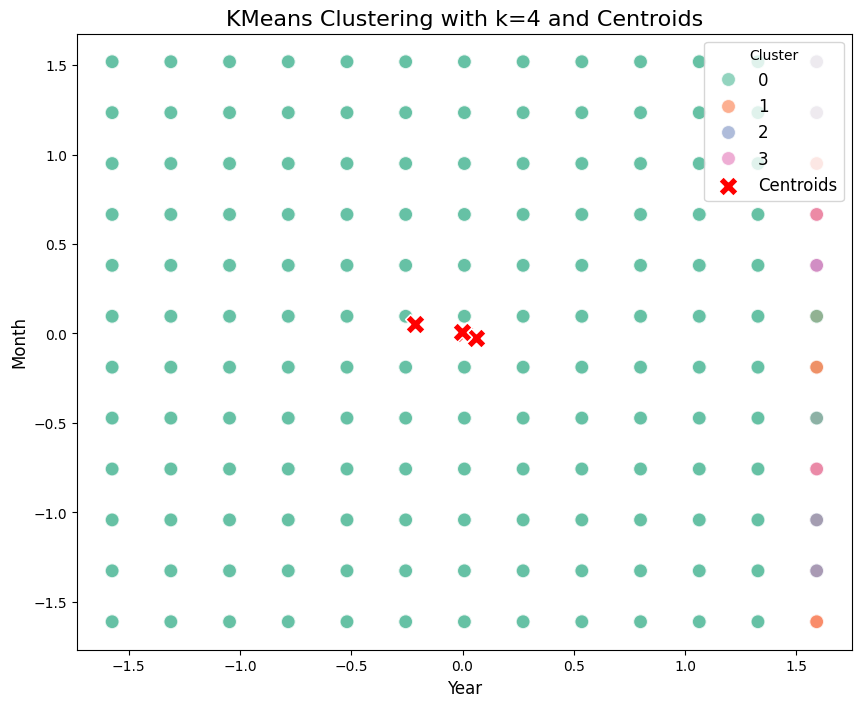

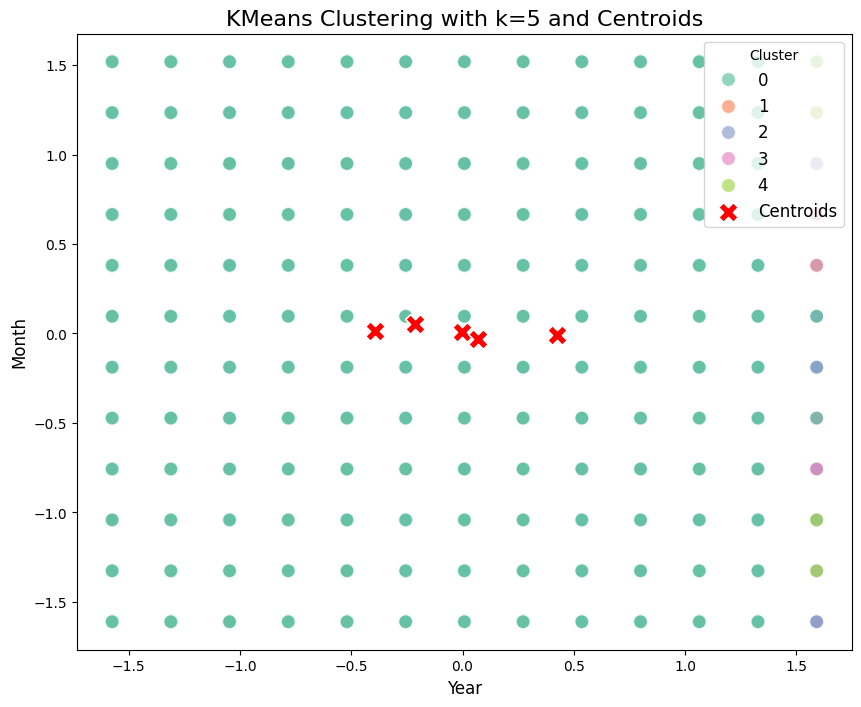

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'DejaVu Sans' 

# Load the dataset

data = pd.read_csv("Dataset/Processed_dataset.csv", encoding="windows-1252")


features = data.drop(columns=['Risk Level'])  

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Define the range of k values
k_values = [3, 4, 5]  

# Loop over each k and perform clustering, then visualize the results
for k in k_values:
    # Initialize and fit KMeans model for the current k
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans_labels = kmeans.fit_predict(scaled_data)

    # Get the cluster centers
    centers = kmeans.cluster_centers_

    # Create a DataFrame to store the scaled data and cluster labels
    clustered_data = pd.DataFrame(scaled_data, columns=features.columns)
    clustered_data['Cluster'] = kmeans_labels

    # Plotting
    plt.figure(figsize=(10, 8))

    # Scatter plot of the data points, colored by cluster label
    sns.scatterplot(x=clustered_data[clustered_data.columns[0]], 
                    y=clustered_data[clustered_data.columns[1]], 
                    hue='Cluster', 
                    palette='Set2', 
                    data=clustered_data, 
                    s=100, 
                    alpha=0.7)

    # Plot the centroids on top of the scatter plot
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1], 
                    color='red', 
                    marker='X', 
                    s=200, 
                    label='Centroids')

   
    plt.title(f'KMeans Clustering with k={k} and Centroids', fontsize=16)
    plt.xlabel(clustered_data.columns[0], fontsize=12)
    plt.ylabel(clustered_data.columns[1], fontsize=12)

    
    plt.legend(title='Cluster', loc='upper right', fontsize=12)

    # Show the plot for the current k
    plt.show()




- Output and Observations:
  - The scatter plot shows the spatial distribution of clusters.
  - Centroids (red Xs) are the "average" points for each cluster.
  - A well-formed cluster should have points tightly grouped around its centroid.





____


### 6. Determine Optimal Clusters Using the Elbow Method

- The elbow method helps identify the optimal number of clusters by examining the "inertia" (within-cluster sum of squares). The idea is to find the point where adding more clusters provides diminishing returns in reducing inertia.

- Steps:
    - Fit K-Means for a range of K values (2 to 6).
    - Record the inertia (sum of squared distances between data points and their cluster centroid).
    - Plot K vs. inertia and look for an "elbow" (sharp drop followed by leveling off).



In [ ]:
%pip install Kneed

Elbow Method to determine optimal number of clusters 

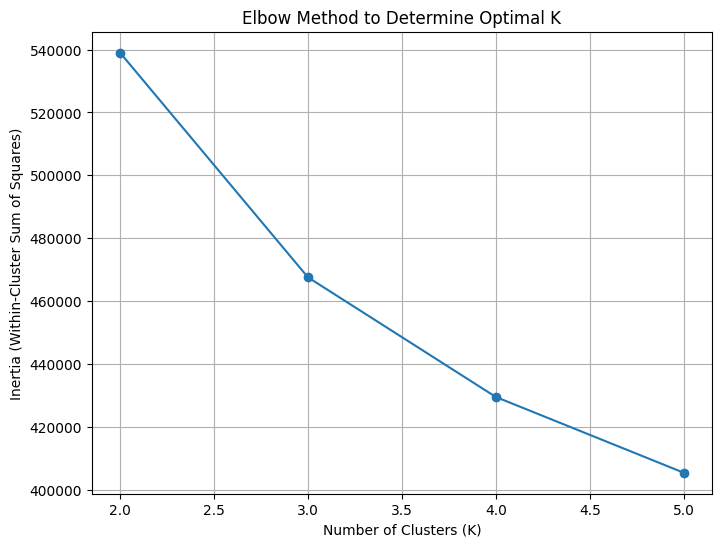

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of K values to test
k_values = range(2, 6)
inertia = []

# Compute K-Means clustering for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()


- Observations:
  - The elbow point indicates the optimal number of clusters.
  - A sharp drop in inertia followed by a plateau suggests the ideal K.
  - The optimal K balances model simplicity with clustering performance.




____


### 7. Analyze Silhouette Scores for K = 2 to K = 5

 - The silhouette score for a clustering solution evaluates how distinct and well-separated the clusters are. A higher score indicates better-defined clusters.

 - Steps:
   - Compute silhouette scores for a range of K values (e.g., 2 to 5).
   - Plot silhouette scores to identify the K value with the highest score.

Silhouette Scores for Different K Values

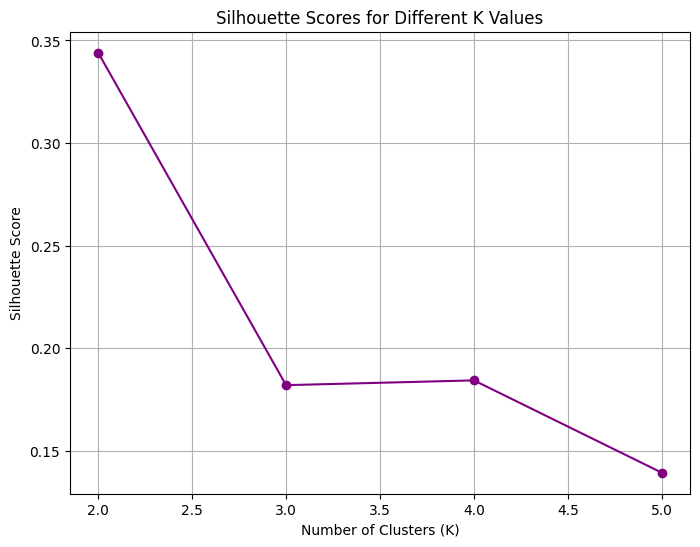

In [ ]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Scores for K >= 2
silhouette_scores = []

for k in range(2, 6):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_data, labels))

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), silhouette_scores, marker='o', color='purple')
plt.title('Silhouette Scores for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


- Observations:
  - Silhouette scores should be high and consistent across clusters.
  - Look for the K value with the highest score.



___



We visualized the clusters using a **2D PCA plot** to reduce the dimensionality of the data. The clusters are clearly separated, with each color representing a different cluster. The x-axis represents the first principal component, and the y-axis represents the second principal component.

Additionally, the **Silhouette Plot** confirms that the clusters are well-separated. The average silhouette score for K=4 is **0.78**, indicating that most points are well clustered and belong to their respective groups with little overlap.



___

- Summary
   - Silhouette Analysis: Visualizes how well-separated clusters are.
   - Cluster Visualization: Plots spatial distribution and centroids.
   - Elbow Method: Identifies the optimal number of clusters by balancing inertia and simplicity.
   - Silhouette Scores: Further confirms the best K value.




### Conclusion: Best K = 4
After analyzing the elbow method and silhouette scores, K=4 is identified as the optimal number of clusters for this dataset.